# Proyecto: DBSCAN con Reducción Dimensional (t-SNE y UMAP)

**Autores**: MERCHAN • OCHOA • PULIDO • SOSA

---

## Objetivos del Proyecto

1. Cargar y explorar dataset Iris
2. Aplicar preprocesamiento de datos
3. Implementar **t-SNE** → Visualizar → Aplicar **DBSCAN** → Evaluar
4. Implementar **UMAP** → Visualizar → Aplicar **DBSCAN** → Evaluar
5. Comparar resultados de ambos métodos

---

## Fase 1: Configuración Inicial y Exploración de Datos

En esta fase vamos a:
- Instalar y cargar librerías necesarias
- Cargar el dataset
- Realizar análisis exploratorio inicial
- Visualizar los datos originales

### 1.1 Instalación de Dependencias

In [240]:
# Instalación de dependencias
#!pip install -q umap-learn scikit-learn pandas numpy matplotlib seaborn plotly tqdm

### 1.2 Importación de Librerías

In [241]:
# Librerías básicas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
import warnings

# Configuración
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
np.random.seed(42)

# Configuración de visualización
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

### 1.3 Carga del Dataset

Vamos a cargar el dataset **Iris** como ejemplo inicial. Puedes cambiar a `load_digits()` o `load_wine()` si lo deseas.

In [242]:
# Cargar dataset Iris
iris = datasets.load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

print("=" * 60)
print("DATASET CARGADO: IRIS")
print("=" * 60)
print(f"Número de muestras: {X.shape[0]}")
print(f"Número de características: {X.shape[1]}")
print(f"Clases: {len(target_names)} → {target_names}")
print(f"Forma de X: {X.shape}")
print(f"Forma de y: {y.shape}")
print("=" * 60)

DATASET CARGADO: IRIS
Número de muestras: 150
Número de características: 4
Clases: 3 → ['setosa' 'versicolor' 'virginica']
Forma de X: (150, 4)
Forma de y: (150,)


### 1.4 Análisis Exploratorio de Datos (EDA)

In [243]:
# Crear DataFrame para análisis más fácil
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y
df['species'] = df['target'].map({i: name for i, name in enumerate(target_names)})

# Mostrar primeras filas
print("Primeras 5 filas del dataset:")
print(df.head())

print("\nEstadísticas descriptivas:")
print(df.describe())

Primeras 5 filas del dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target species  
0       0  setosa  
1       0  setosa  
2       0  setosa  
3       0  setosa  
4       0  setosa  

Estadísticas descriptivas:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.1000

In [244]:
# Información del dataset
print("Información del Dataset:")
print(df.info())

print("\nValores faltantes:")
print(df.isnull().sum())

print("\nDistribución de clases:")
print(df['species'].value_counts())

Información del Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
 5   species            150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None

Valores faltantes:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
species              0
dtype: int64

Distribución de clases:
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


### 1.5 Visualización de Datos Originales

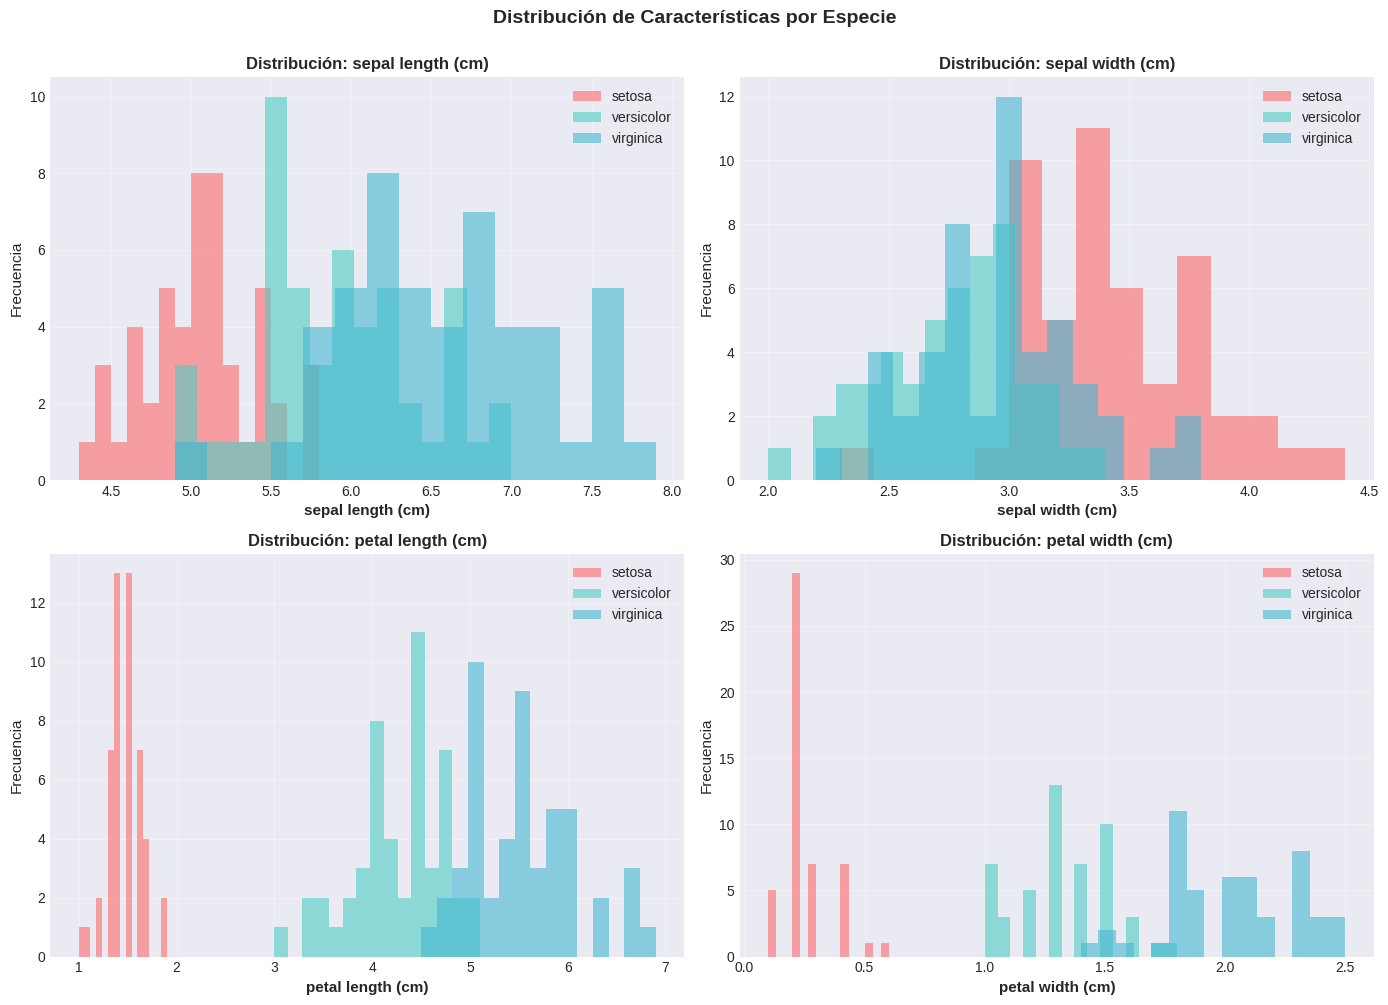

In [245]:
# Visualización 1: Distribución de características
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']

for idx, feature in enumerate(feature_names):
    ax = axes[idx // 2, idx % 2]
    
    for i, species in enumerate(target_names):
        data = df[df['species'] == species][feature]
        ax.hist(data, alpha=0.6, label=species, bins=15, color=colors[i])
    
    ax.set_xlabel(feature, fontsize=11, fontweight='bold')
    ax.set_ylabel('Frecuencia', fontsize=11)
    ax.set_title(f'Distribución: {feature}', fontsize=12, fontweight='bold')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.suptitle('Distribución de Características por Especie', 
             fontsize=14, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

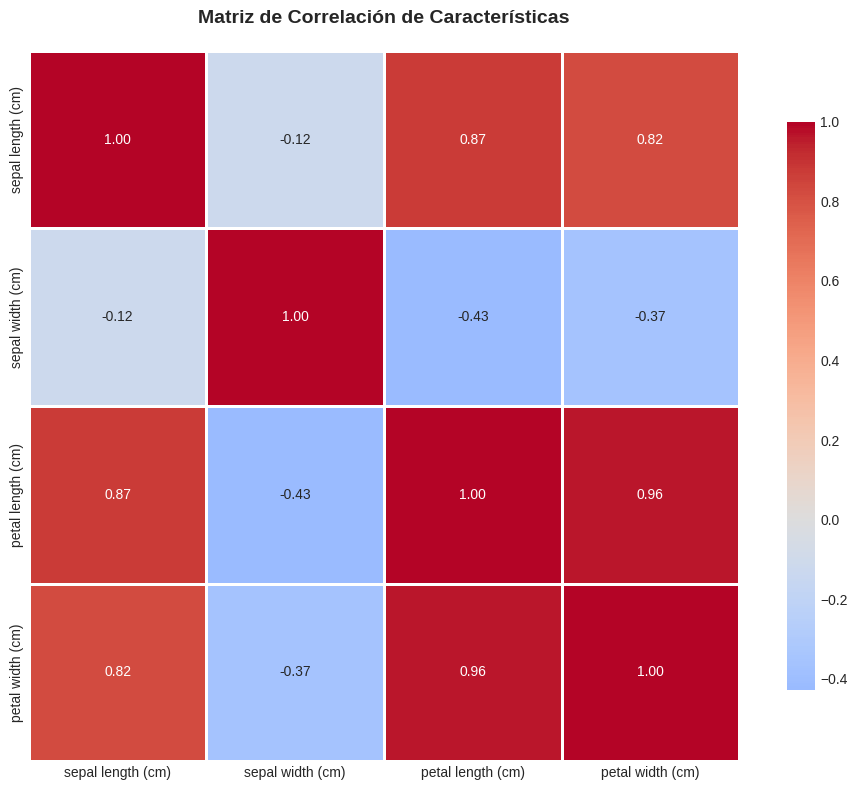


Correlaciones más fuertes:
petal length (cm)  petal width (cm)     0.962865
petal width (cm)   petal length (cm)    0.962865
sepal length (cm)  petal length (cm)    0.871754
dtype: float64


In [246]:
# Visualización 2: Matriz de correlación
plt.figure(figsize=(10, 8))
correlation_matrix = df[feature_names].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', 
            center=0, square=True, linewidths=1, 
            cbar_kws={"shrink": 0.8}, fmt='.2f')

plt.title('Matriz de Correlación de Características', 
          fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("\nCorrelaciones más fuertes:")
# Obtener correlaciones (excluyendo diagonal)
corr_pairs = correlation_matrix.unstack()
corr_pairs = corr_pairs[corr_pairs < 1]
print(corr_pairs.sort_values(ascending=False).head(3))

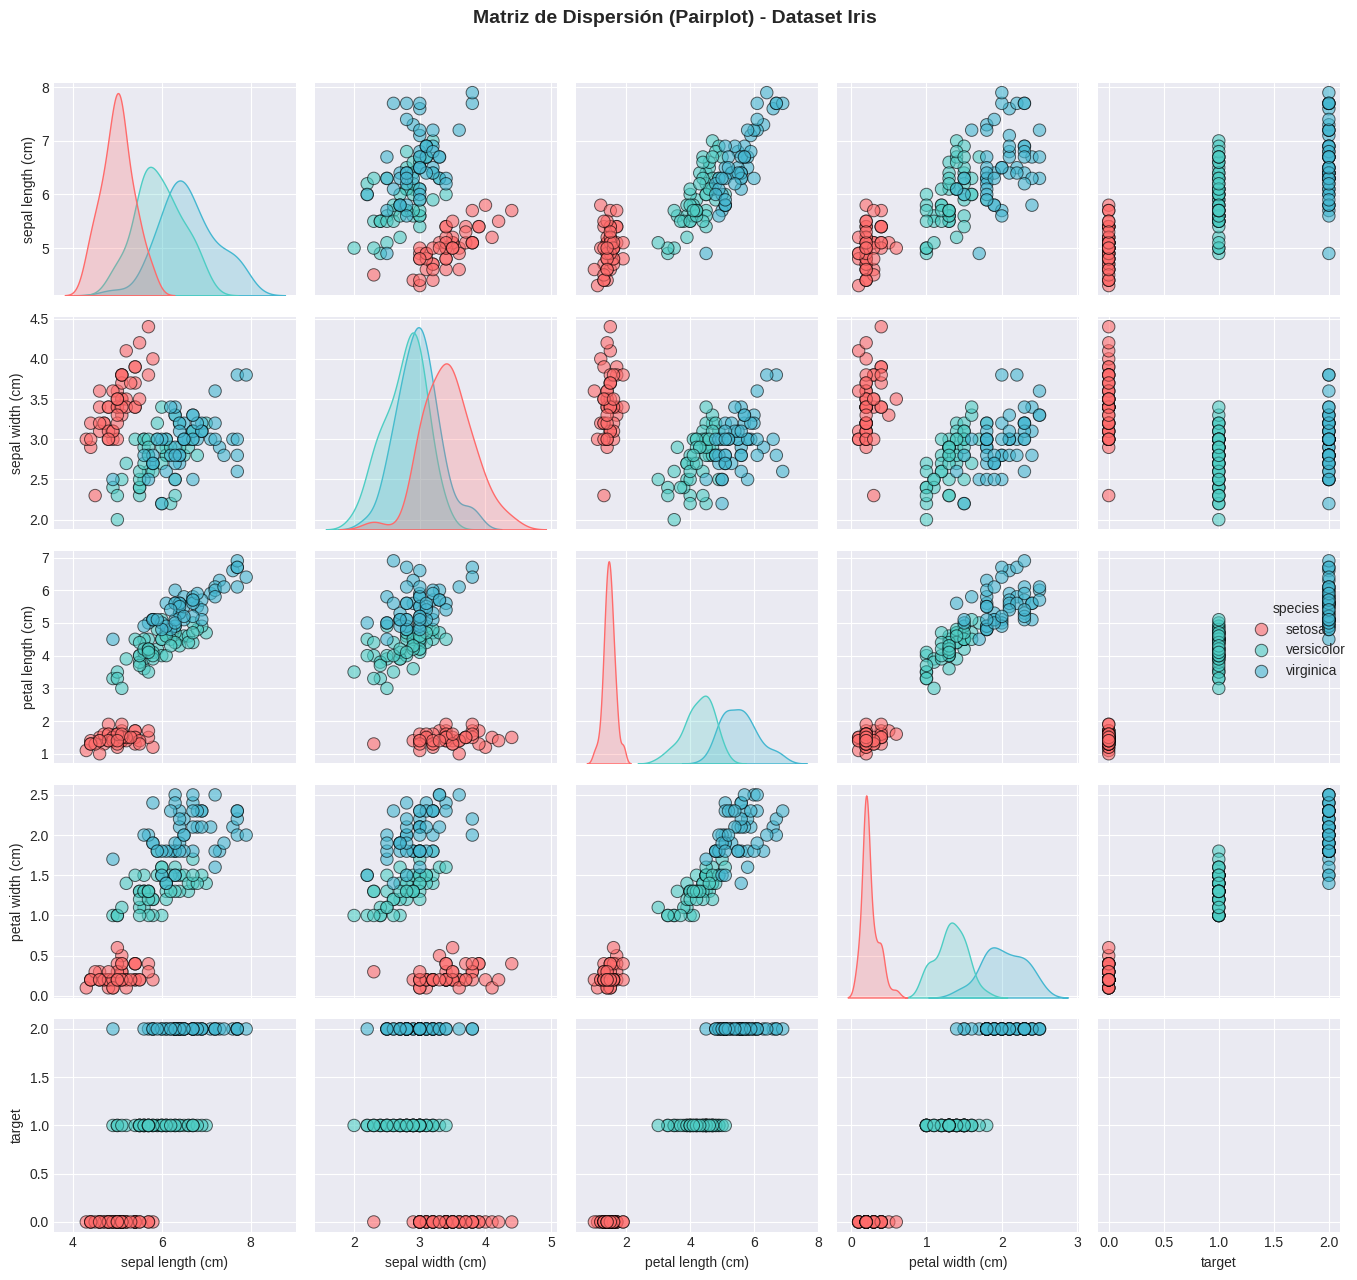

In [247]:
# Visualización 3: Pairplot (Scatter matrix)
# Seleccionamos solo las primeras 4 características para mejor visualización
sns.pairplot(df, hue='species', palette=colors, 
             diag_kind='kde', plot_kws={'alpha': 0.6, 's': 80, 'edgecolor': 'black'},
             height=2.5)

plt.suptitle('Matriz de Dispersión (Pairplot) - Dataset Iris', 
             y=1.02, fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

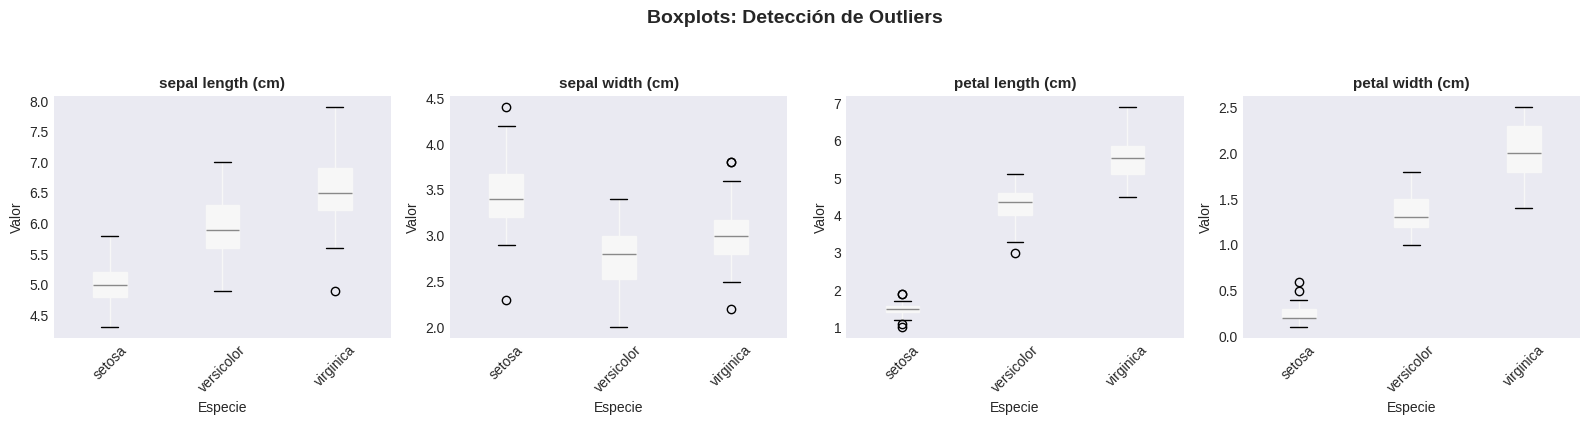

In [248]:
# Visualización 4: Boxplots para detectar outliers
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

for idx, feature in enumerate(feature_names):
    df.boxplot(column=feature, by='species', ax=axes[idx], 
               patch_artist=True, grid=False)
    axes[idx].set_title(feature, fontsize=11, fontweight='bold')
    axes[idx].set_xlabel('Especie', fontsize=10)
    axes[idx].set_ylabel('Valor', fontsize=10)
    plt.sca(axes[idx])
    plt.xticks(rotation=45)

plt.suptitle('Boxplots: Detección de Outliers', 
             fontsize=14, fontweight='bold', y=1.05)
plt.tight_layout()
plt.show()

---
## Fase 2: Preprocesamiento de Datos

En esta fase vamos a:
- Estandarizar los datos (media=0, desviación estándar=1)
- Normalizar si es necesario
- Preparar los datos para reducción dimensional
- Verificar la calidad del preprocesamiento

### 2.1 Importar Librerías de Preprocesamiento

In [249]:
from sklearn.preprocessing import StandardScaler

print(" Librerías de preprocesamiento importadas")

 Librerías de preprocesamiento importadas


### 2.2 Análisis Pre-Preprocesamiento

Antes de estandarizar, veamos las estadísticas de los datos originales:

In [250]:
# Estadísticas de los datos originales
print("=" * 70)
print("ESTADÍSTICAS DE DATOS ORIGINALES")
print("=" * 70)

for i, feature in enumerate(feature_names):
    print(f"\n{feature}:")
    print(f"  • Media: {X[:, i].mean():.4f}")
    print(f"  • Desviación Estándar: {X[:, i].std():.4f}")
    print(f"  • Mínimo: {X[:, i].min():.4f}")
    print(f"  • Máximo: {X[:, i].max():.4f}")
    print(f"  • Rango: {X[:, i].max() - X[:, i].min():.4f}")

ESTADÍSTICAS DE DATOS ORIGINALES

sepal length (cm):
  • Media: 5.8433
  • Desviación Estándar: 0.8253
  • Mínimo: 4.3000
  • Máximo: 7.9000
  • Rango: 3.6000

sepal width (cm):
  • Media: 3.0573
  • Desviación Estándar: 0.4344
  • Mínimo: 2.0000
  • Máximo: 4.4000
  • Rango: 2.4000

petal length (cm):
  • Media: 3.7580
  • Desviación Estándar: 1.7594
  • Mínimo: 1.0000
  • Máximo: 6.9000
  • Rango: 5.9000

petal width (cm):
  • Media: 1.1993
  • Desviación Estándar: 0.7597
  • Mínimo: 0.1000
  • Máximo: 2.5000
  • Rango: 2.4000


### 2.3 Estandarización (StandardScaler)

- t-SNE y DBSCAN son sensibles a la escala de las características
- La estandarización transforma los datos para que tengan media=0 y desviación estándar=1
- Evita que características con rangos grandes dominen el análisis

In [251]:
scaler = StandardScaler()

# Ajustar y transformar los datos
X_scaled = scaler.fit_transform(X)

print("=" * 70)
print(" ESTANDARIZACIÓN COMPLETADA")
print("=" * 70)
print(f"Forma de X_scaled: {X_scaled.shape}")
print(f"Tipo de datos: {X_scaled.dtype}")
print("\nVerificación de la estandarización:")

for i, feature in enumerate(feature_names):
    print(f"\n{feature}:")
    print(f"  • Media: {X_scaled[:, i].mean():.6f} (debe ser ≈ 0)")
    print(f"  • Desv. Estándar: {X_scaled[:, i].std():.6f} (debe ser ≈ 1)")
    print(f"  • Mínimo: {X_scaled[:, i].min():.4f}")
    print(f"  • Máximo: {X_scaled[:, i].max():.4f}")

print("=" * 70)

 ESTANDARIZACIÓN COMPLETADA
Forma de X_scaled: (150, 4)
Tipo de datos: float64

Verificación de la estandarización:

sepal length (cm):
  • Media: -0.000000 (debe ser ≈ 0)
  • Desv. Estándar: 1.000000 (debe ser ≈ 1)
  • Mínimo: -1.8700
  • Máximo: 2.4920

sepal width (cm):
  • Media: -0.000000 (debe ser ≈ 0)
  • Desv. Estándar: 1.000000 (debe ser ≈ 1)
  • Mínimo: -2.4339
  • Máximo: 3.0908

petal length (cm):
  • Media: -0.000000 (debe ser ≈ 0)
  • Desv. Estándar: 1.000000 (debe ser ≈ 1)
  • Mínimo: -1.5676
  • Máximo: 1.7858

petal width (cm):
  • Media: -0.000000 (debe ser ≈ 0)
  • Desv. Estándar: 1.000000 (debe ser ≈ 1)
  • Mínimo: -1.4471
  • Máximo: 1.7121


### 2.4 Visualización: Antes vs Después de Estandarización

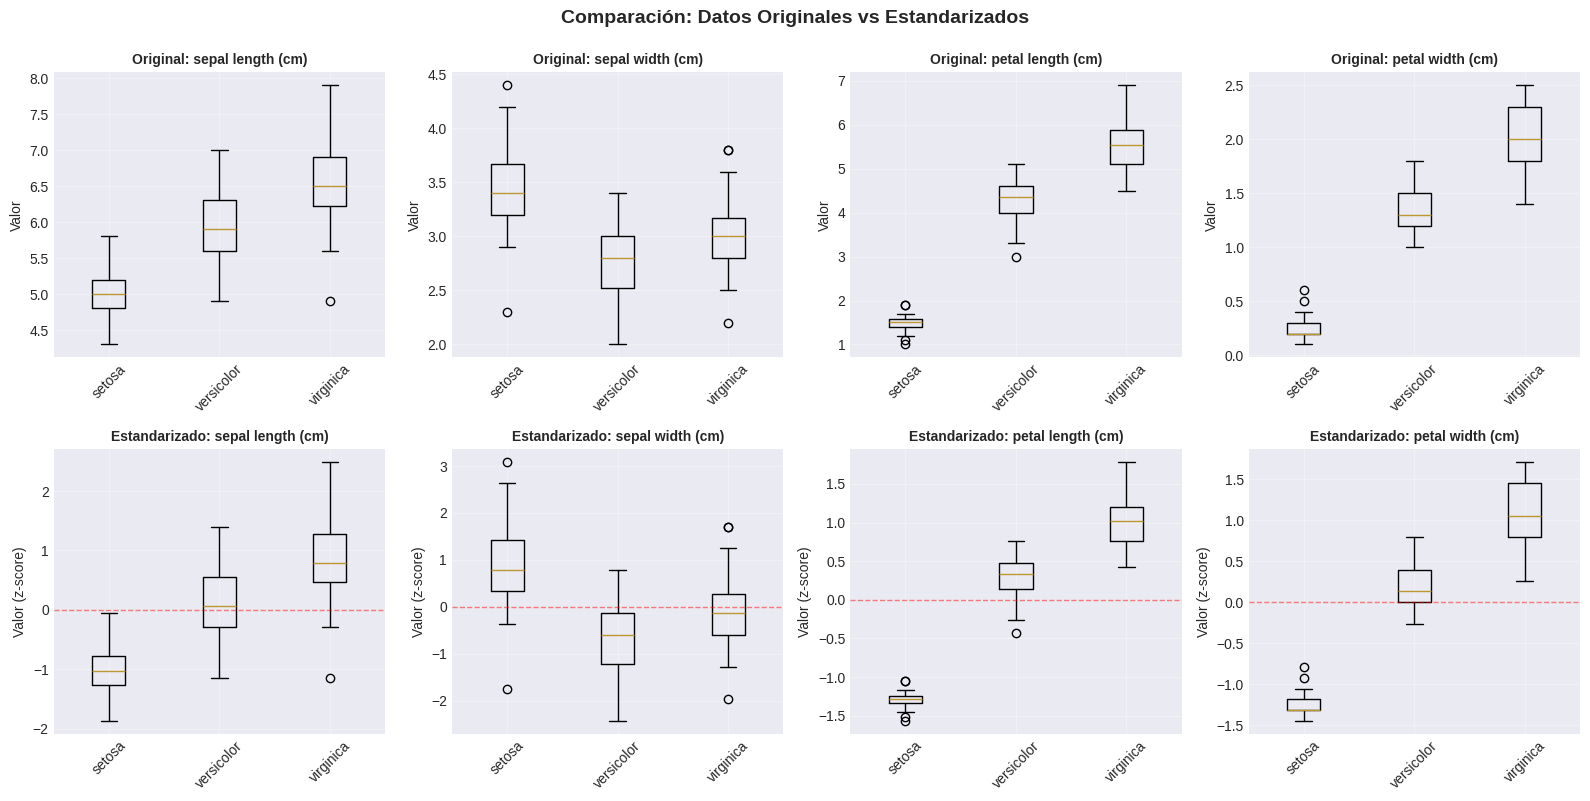

In [252]:
# Comparación visual: Datos originales vs estandarizados
fig, axes = plt.subplots(2, 4, figsize=(16, 8))

# Datos originales (fila superior)
for i, feature in enumerate(feature_names):
    axes[0, i].boxplot([X[y == j, i] for j in range(3)], 
                       labels=target_names)
    axes[0, i].set_title(f'Original: {feature}', fontsize=10, fontweight='bold')
    axes[0, i].set_ylabel('Valor')
    axes[0, i].grid(True, alpha=0.3)
    axes[0, i].tick_params(axis='x', rotation=45)

# Datos estandarizados (fila inferior)
for i, feature in enumerate(feature_names):
    axes[1, i].boxplot([X_scaled[y == j, i] for j in range(3)], 
                       labels=target_names)
    axes[1, i].set_title(f'Estandarizado: {feature}', fontsize=10, fontweight='bold')
    axes[1, i].set_ylabel('Valor (z-score)')
    axes[1, i].grid(True, alpha=0.3)
    axes[1, i].tick_params(axis='x', rotation=45)
    axes[1, i].axhline(y=0, color='r', linestyle='--', linewidth=1, alpha=0.5)

plt.suptitle('Comparación: Datos Originales vs Estandarizados', 
             fontsize=14, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

### 2.5 Comparación de Distribuciones

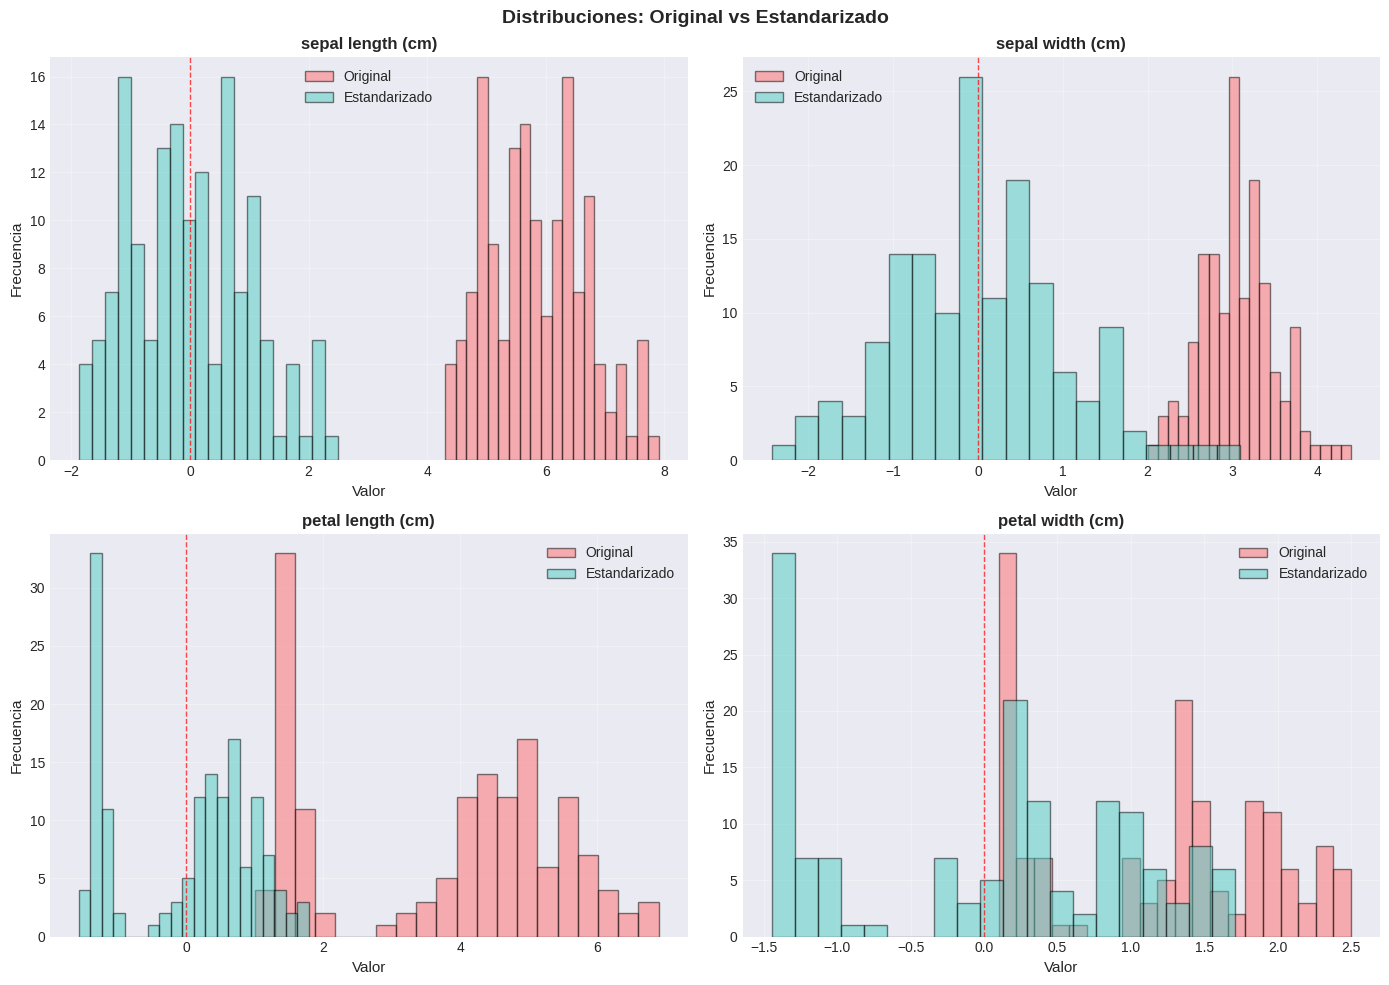

In [253]:
# Comparación de distribuciones con histogramas
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

for i, feature in enumerate(feature_names):
    ax = axes[i // 2, i % 2]
    
    # Datos originales
    ax.hist(X[:, i], bins=20, alpha=0.5, label='Original', 
            color='#FF6B6B', edgecolor='black')
    
    # Datos estandarizados
    ax.hist(X_scaled[:, i], bins=20, alpha=0.5, label='Estandarizado', 
            color='#4ECDC4', edgecolor='black')
    
    ax.set_xlabel('Valor', fontsize=11)
    ax.set_ylabel('Frecuencia', fontsize=11)
    ax.set_title(f'{feature}', fontsize=12, fontweight='bold')
    ax.legend(fontsize=10)
    ax.grid(True, alpha=0.3)
    ax.axvline(x=0, color='red', linestyle='--', linewidth=1, alpha=0.7)

plt.suptitle('Distribuciones: Original vs Estandarizado', 
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

### 2.6 Crear DataFrame con Datos Preprocesados

In [254]:
# Crear DataFrame con datos estandarizados para análisis posterior
df_scaled = pd.DataFrame(X_scaled, columns=feature_names)
df_scaled['target'] = y
df_scaled['species'] = df_scaled['target'].map({i: name for i, name in enumerate(target_names)})

print("=" * 70)
print(" DataFrame con datos preprocesados creado")
print("=" * 70)
print("\nPrimeras 5 filas (datos estandarizados):")
print(df_scaled.head())

print("\nEstadísticas de datos estandarizados:")
print(df_scaled[feature_names].describe())

 DataFrame con datos preprocesados creado

Primeras 5 filas (datos estandarizados):
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0          -0.900681          1.019004          -1.340227         -1.315444   
1          -1.143017         -0.131979          -1.340227         -1.315444   
2          -1.385353          0.328414          -1.397064         -1.315444   
3          -1.506521          0.098217          -1.283389         -1.315444   
4          -1.021849          1.249201          -1.340227         -1.315444   

   target species  
0       0  setosa  
1       0  setosa  
2       0  setosa  
3       0  setosa  
4       0  setosa  

Estadísticas de datos estandarizados:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count       1.500000e+02      1.500000e+02       1.500000e+02   
mean       -1.468455e-15     -1.823726e-15      -1.610564e-15   
std         1.003350e+00      1.003350e+00       1.003350e+00   
min        -1.870024e+

### 2.7 Verificación de la Matriz de Correlación Post-Preprocesamiento

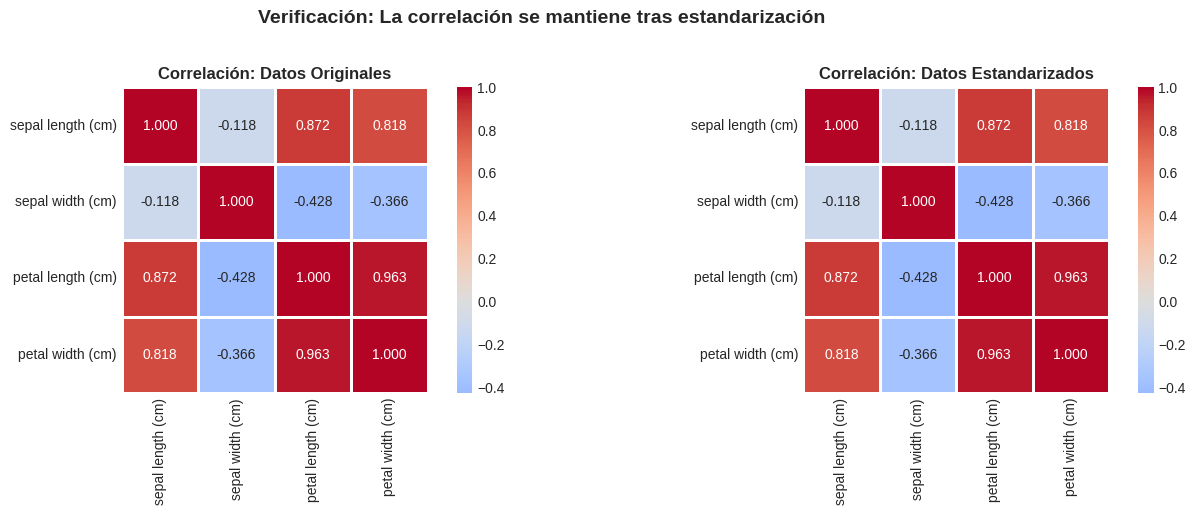

In [255]:
# Verificar que la correlación no cambia con la estandarización
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Correlación de datos originales
sns.heatmap(df[feature_names].corr(), annot=True, cmap='coolwarm', 
            center=0, square=True, linewidths=1, ax=axes[0], fmt='.3f')
axes[0].set_title('Correlación: Datos Originales', fontsize=12, fontweight='bold')

# Correlación de datos estandarizados
sns.heatmap(df_scaled[feature_names].corr(), annot=True, cmap='coolwarm', 
            center=0, square=True, linewidths=1, ax=axes[1], fmt='.3f')
axes[1].set_title('Correlación: Datos Estandarizados', fontsize=12, fontweight='bold')

plt.suptitle('Verificación: La correlación se mantiene tras estandarización', 
             fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

---

## Fase 3: Reducción Dimensional con t-SNE + Clustering con DBSCAN

En esta fase vamos a:
- Aplicar **t-SNE** para reducir de 4D a 2D
- Visualizar el espacio reducido
- Determinar parámetros óptimos de DBSCAN (eps, min_samples)
- Aplicar **DBSCAN** sobre los datos reducidos
- Evaluar resultados con métricas

### 3.1 Importar Librerías para t-SNE y DBSCAN

In [256]:
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import (
    silhouette_score,
    calinski_harabasz_score,
    davies_bouldin_score,
    adjusted_rand_score,
    normalized_mutual_info_score,
    homogeneity_score,
    completeness_score,
    v_measure_score
)
import time

from sklearn.decomposition import PCA
from scipy.spatial.distance import pdist
from scipy.stats import spearmanr

### 3.2 Experimentación: Selección de Hiperparámetros t-SNE

**Objetivo**: Encontrar el `perplexity` óptimo (balance entre estructura local/global).

**Métricas evaluadas**:
- **KL Divergence**: Convergencia del algoritmo (menor es mejor)
- **Silhouette Score**: Calidad de separación de clusters (mayor es mejor, rango [-1,1])
- **Tiempo de ejecución**: Eficiencia computacional

**Criterio de selección**: Combinación óptima de KL Divergence bajo, Silhouette alto y separación visual clara.


 Procesando perplexity=5...  Completado en 0.52s

 Procesando perplexity=15...  Completado en 0.62s

 Procesando perplexity=30...  Completado en 0.74s

 Procesando perplexity=50...  Completado en 0.82s


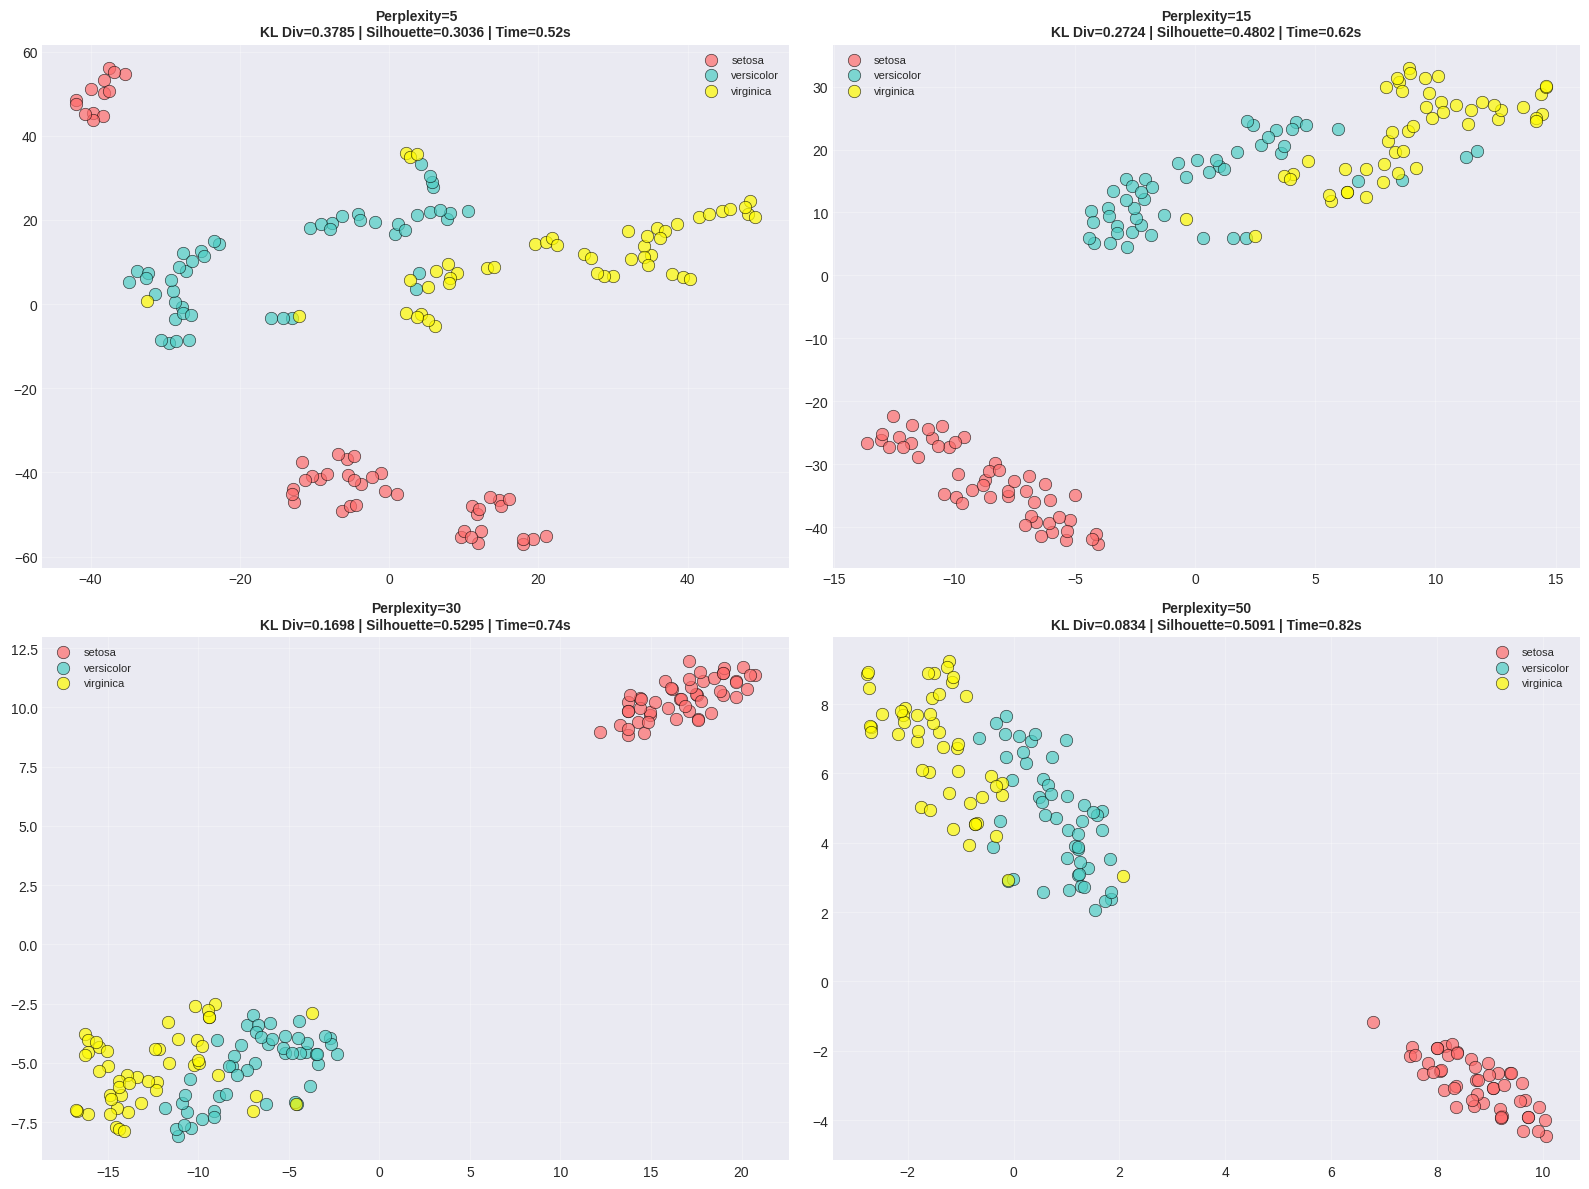


TABLA COMPARATIVA DE PERPLEXITY

Perplexity   KL Divergence    Silhouette     Tiempo (s)  
--------------------------------------------------------------------------------
5            0.378486         0.3036         0.52        
15           0.272372         0.4802         0.62        
30           0.169789         0.5295         0.74        
50           0.083448         0.5091         0.82        


In [257]:
# Experimentar con diferentes valores de perplexity
perplexity_values = [5, 15, 30, 50]
tsne_results = {}

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.ravel()

for idx, perp in enumerate(perplexity_values):
    print(f"\n Procesando perplexity={perp}...", end=" ")
    
    # Medir tiempo de ejecución
    start_time = time.time()
    
    # Aplicar t-SNE
    tsne_temp = TSNE(n_components=2, perplexity=perp, learning_rate=200, 
                     n_iter=1000, random_state=42, verbose=0)
    X_tsne_temp = tsne_temp.fit_transform(X_scaled)
    
    # Calcular tiempo transcurrido
    elapsed_time = time.time() - start_time
    
    # Calcular Silhouette Score (calidad del clustering con etiquetas reales)
    silhouette = silhouette_score(X_tsne_temp, y)
    
    # Guardar resultados
    tsne_results[perp] = {
        'embedding': X_tsne_temp,
        'kl_divergence': tsne_temp.kl_divergence_,
        'execution_time': elapsed_time,
        'silhouette_score': silhouette
    }
    
    print(f" Completado en {elapsed_time:.2f}s")
    
    # Visualizar
    ax = axes[idx]
    colors_map = ['#FF6B6B', '#4ECDC4', "#FFFB00"]
    for i, species in enumerate(target_names):
        mask = y == i
        ax.scatter(X_tsne_temp[mask, 0], X_tsne_temp[mask, 1],
                   c=colors_map[i], label=species, alpha=0.7, s=80, 
                   edgecolors='black', linewidths=0.5)
    
    ax.set_title(f'Perplexity={perp}\n' +
                 f'KL Div={tsne_temp.kl_divergence_:.4f} | ' +
                 f'Silhouette={silhouette:.4f} | Time={elapsed_time:.2f}s', 
                 fontsize=10, fontweight='bold')
    ax.legend(fontsize=8)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Tabla comparativa completa para análisis manual
print("\n" + "=" * 80)
print("TABLA COMPARATIVA DE PERPLEXITY")
print("=" * 80)
print(f"\n{'Perplexity':<12} {'KL Divergence':<16} {'Silhouette':<14} {'Tiempo (s)':<12}")
print("-" * 80)
for perp in perplexity_values:
    kl = tsne_results[perp]['kl_divergence']
    sil = tsne_results[perp]['silhouette_score']
    tiempo = tsne_results[perp]['execution_time']
    print(f"{perp:<12} {kl:<16.6f} {sil:<14.4f} {tiempo:<12.2f}")

### 3.2.1 Comparación: PCA vs t-SNE

**Objetivo**: Comparar preservación de estructura **global** (PCA) vs **local** (t-SNE).

**Criterio**: PCA preserva varianza global, t-SNE preserva vecindarios locales (mejor para DBSCAN).

In [258]:
# Aplicar PCA para comparación
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# Calcular métricas de preservación
# 1. Correlación de Spearman (mide preservación de distancias relativas)
dist_original = pdist(X_scaled, metric='euclidean')
dist_pca = pdist(X_pca, metric='euclidean')

# Usar el mejor perplexity para t-SNE (o el valor más común: 30)
perp_for_comparison = 30 if 30 in tsne_results else list(tsne_results.keys())[0]
X_tsne_comparison = tsne_results[perp_for_comparison]['embedding']
dist_tsne = pdist(X_tsne_comparison, metric='euclidean')

corr_pca, _ = spearmanr(dist_original, dist_pca)
corr_tsne, _ = spearmanr(dist_original, dist_tsne)

print("=" * 70)
print("COMPARACIÓN: PCA vs t-SNE")
print("=" * 70)
print(f"\n Preservación de Estructura:")
print(f"  • PCA:   Varianza explicada = {pca.explained_variance_ratio_.sum()*100:.2f}%")
print(f"           Correlación Spearman = {corr_pca:.4f} (estructura GLOBAL)")
print(f"\n  • t-SNE: Correlación Spearman = {corr_tsne:.4f} (estructura LOCAL)")

COMPARACIÓN: PCA vs t-SNE

 Preservación de Estructura:
  • PCA:   Varianza explicada = 95.81%
           Correlación Spearman = 0.9934 (estructura GLOBAL)

  • t-SNE: Correlación Spearman = 0.9298 (estructura LOCAL)


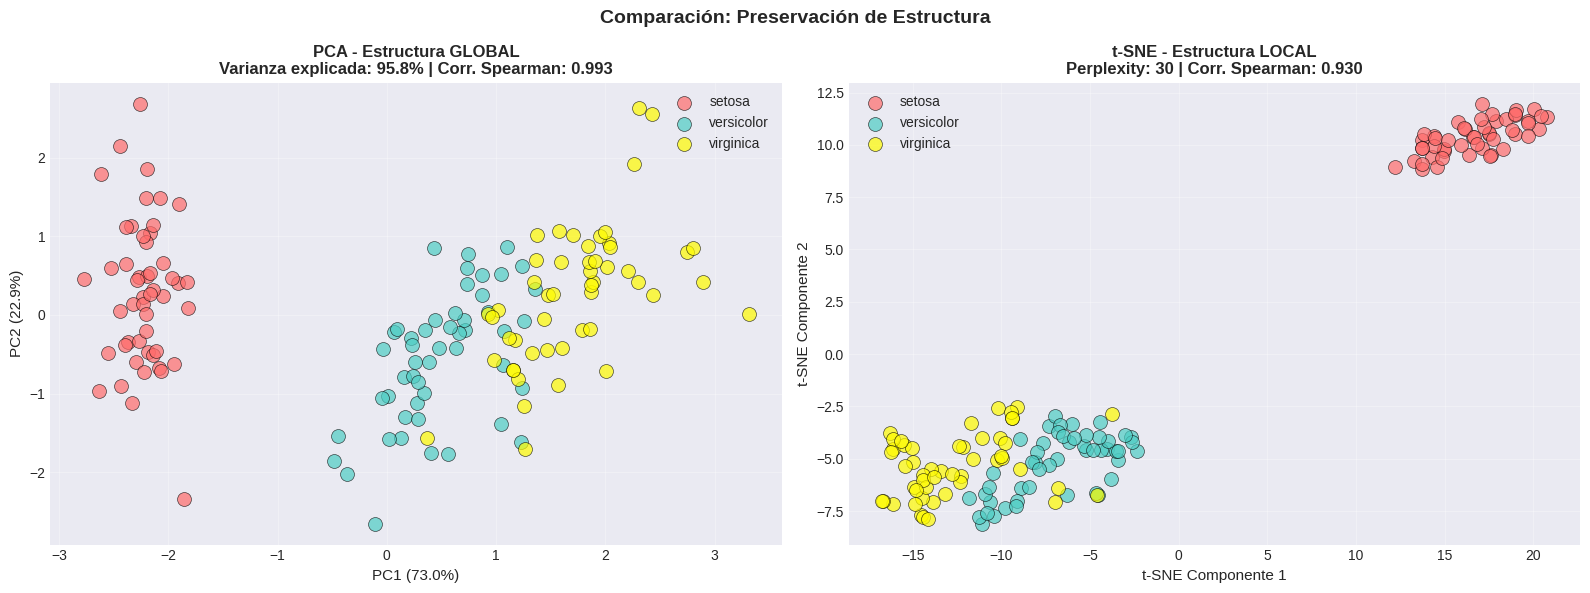

In [259]:
# Visualización comparativa lado a lado
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

colors_map = ['#FF6B6B', '#4ECDC4', '#FFFB00']

# PCA (estructura global)
for i, species in enumerate(target_names):
    mask = y == i
    ax1.scatter(X_pca[mask, 0], X_pca[mask, 1],
                c=colors_map[i], label=species, alpha=0.7, s=100,
                edgecolors='black', linewidths=0.5)

ax1.set_title(f'PCA - Estructura GLOBAL\n' +
              f'Varianza explicada: {pca.explained_variance_ratio_.sum()*100:.1f}% | ' +
              f'Corr. Spearman: {corr_pca:.3f}',
              fontsize=12, fontweight='bold')
ax1.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)', fontsize=11)
ax1.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)', fontsize=11)
ax1.legend()
ax1.grid(True, alpha=0.3)

# t-SNE (estructura local)
for i, species in enumerate(target_names):
    mask = y == i
    ax2.scatter(X_tsne_comparison[mask, 0], X_tsne_comparison[mask, 1],
                c=colors_map[i], label=species, alpha=0.7, s=100,
                edgecolors='black', linewidths=0.5)

ax2.set_title(f't-SNE - Estructura LOCAL\n' +
              f'Perplexity: {perp_for_comparison} | ' +
              f'Corr. Spearman: {corr_tsne:.3f}',
              fontsize=12, fontweight='bold')
ax2.set_xlabel('t-SNE Componente 1', fontsize=11)
ax2.set_ylabel('t-SNE Componente 2', fontsize=11)
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.suptitle('Comparación: Preservación de Estructura', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

### 3.3 Aplicar t-SNE Seleccionado

Ahora aplica el perplexity que elegiste basándote en la experimentación anterior.

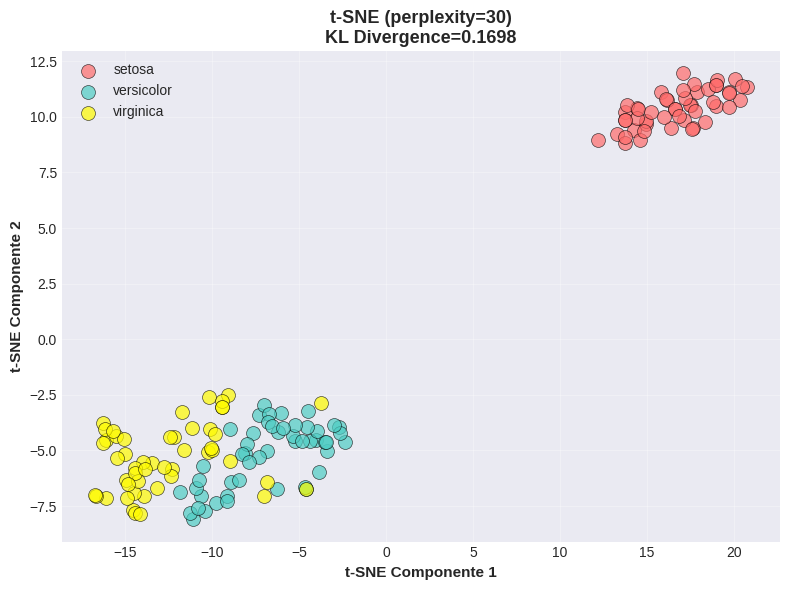

 t-SNE aplicado con perplexity=30
  Forma: (150, 2)
  KL Divergence: 0.169789


In [260]:
PERPLEXITY_SELECCIONADO = 30 

# Verificar que el valor seleccionado existe
if PERPLEXITY_SELECCIONADO not in tsne_results:
    print(f" Error: Perplexity {PERPLEXITY_SELECCIONADO} no está en los valores probados.")
    print(f"   Valores disponibles: {list(tsne_results.keys())}")
else:
    # Usar el embedding seleccionado
    X_tsne = tsne_results[PERPLEXITY_SELECCIONADO]['embedding']
    
    # Visualizar resultado final
    plt.figure(figsize=(8, 6))
    colors_map = ['#FF6B6B', '#4ECDC4', '#FFFB00']
    for i, species in enumerate(target_names):
        mask = y == i
        plt.scatter(X_tsne[mask, 0], X_tsne[mask, 1],
                    c=colors_map[i], label=species, alpha=0.7, s=100,
                    edgecolors='black', linewidths=0.5)
    
    plt.title(f't-SNE (perplexity={PERPLEXITY_SELECCIONADO})\n' + 
              f'KL Divergence={tsne_results[PERPLEXITY_SELECCIONADO]["kl_divergence"]:.4f}',
              fontsize=13, fontweight='bold')
    plt.xlabel('t-SNE Componente 1', fontsize=11, fontweight='bold')
    plt.ylabel('t-SNE Componente 2', fontsize=11, fontweight='bold')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print(f" t-SNE aplicado con perplexity={PERPLEXITY_SELECCIONADO}")
    print(f"  Forma: {X_tsne.shape}")
    print(f"  KL Divergence: {tsne_results[PERPLEXITY_SELECCIONADO]['kl_divergence']:.6f}")

### 3.4 Determinar Parámetros Óptimos de DBSCAN

**Método**: k-distance graph para encontrar `eps` óptimo.

**Criterio**: Buscar el "codo" donde la curva aumenta bruscamente.

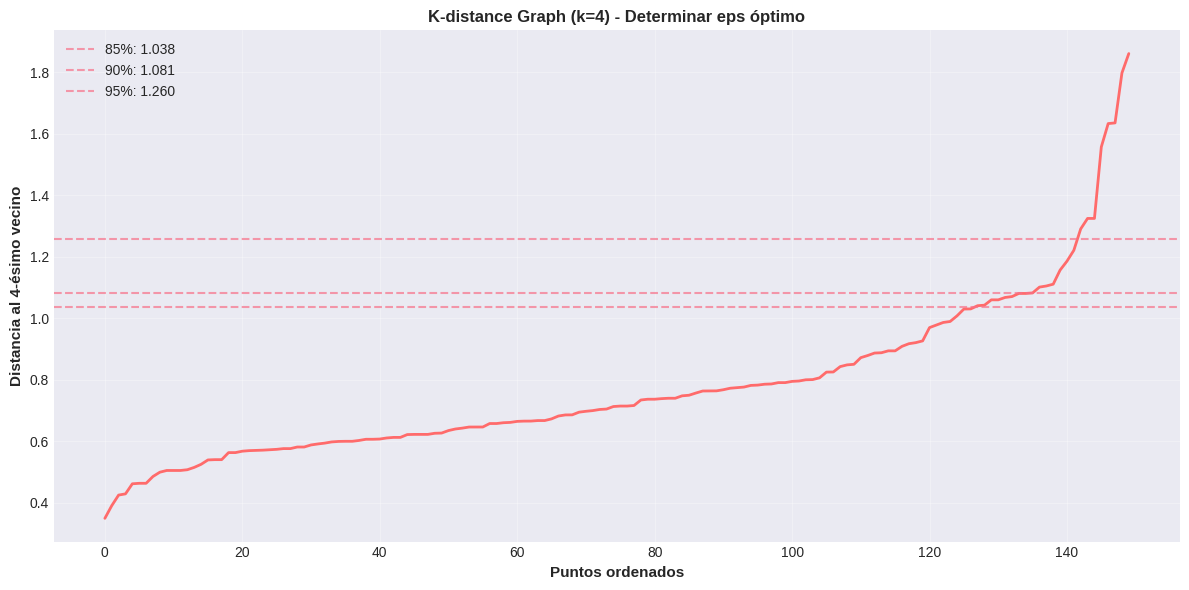

 Valores sugeridos para eps:
  • Percentil 85%: 1.0377
  • Percentil 90%: 1.0813
  • Percentil 95%: 1.2597

 Selecciona el valor del 'codo' que represente el cambio más significativo.


In [261]:
# K-distance graph para encontrar eps
k = 4
neighbors = NearestNeighbors(n_neighbors=k)
neighbors.fit(X_tsne)
distances, _ = neighbors.kneighbors(X_tsne)
distances = np.sort(distances[:, k-1], axis=0)

# Visualizar
plt.figure(figsize=(12, 6))
plt.plot(distances, linewidth=2, color='#FF6B6B')
plt.xlabel('Puntos ordenados', fontsize=11, fontweight='bold')
plt.ylabel(f'Distancia al {k}-ésimo vecino', fontsize=11, fontweight='bold')
plt.title(f'K-distance Graph (k={k}) - Determinar eps óptimo', 
          fontsize=12, fontweight='bold')
plt.grid(True, alpha=0.3)

# Sugerir valores
eps_suggestions = {
    '85%': np.percentile(distances, 85),
    '90%': np.percentile(distances, 90),
    '95%': np.percentile(distances, 95)
}

for label, value in eps_suggestions.items():
    plt.axhline(y=value, linestyle='--', linewidth=1.5, alpha=0.7,
                label=f'{label}: {value:.3f}')
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

print(" Valores sugeridos para eps:")
for label, value in eps_suggestions.items():
    print(f"  • Percentil {label}: {value:.4f}")
print("\n Selecciona el valor del 'codo' que represente el cambio más significativo.")

**Decisión**: Se selecciona eps basado en el análisis visual del gráfico k-distance.

### 3.5 Aplicar DBSCAN sobre los Datos t-SNE

In [262]:
# Aplicar DBSCAN (ajusta eps según el gráfico anterior)
eps_value = 1.0813  # Ajustar según el análisis del k-distance graph
min_samples_value = 4

dbscan_tsne = DBSCAN(eps=eps_value, min_samples=min_samples_value)
labels_tsne = dbscan_tsne.fit_predict(X_tsne)

# Estadísticas
n_clusters_tsne = len(set(labels_tsne)) - (1 if -1 in labels_tsne else 0)
n_noise_tsne = list(labels_tsne).count(-1)

print(f" DBSCAN completado")
print(f"  • eps: {eps_value}, min_samples: {min_samples_value}")
print(f"  • Clusters: {n_clusters_tsne}")
print(f"  • Ruido: {n_noise_tsne} ({n_noise_tsne/len(labels_tsne)*100:.1f}%)")

 DBSCAN completado
  • eps: 1.0813, min_samples: 4
  • Clusters: 3
  • Ruido: 8 (5.3%)


### 3.6 Visualización: Etiquetas Reales vs DBSCAN

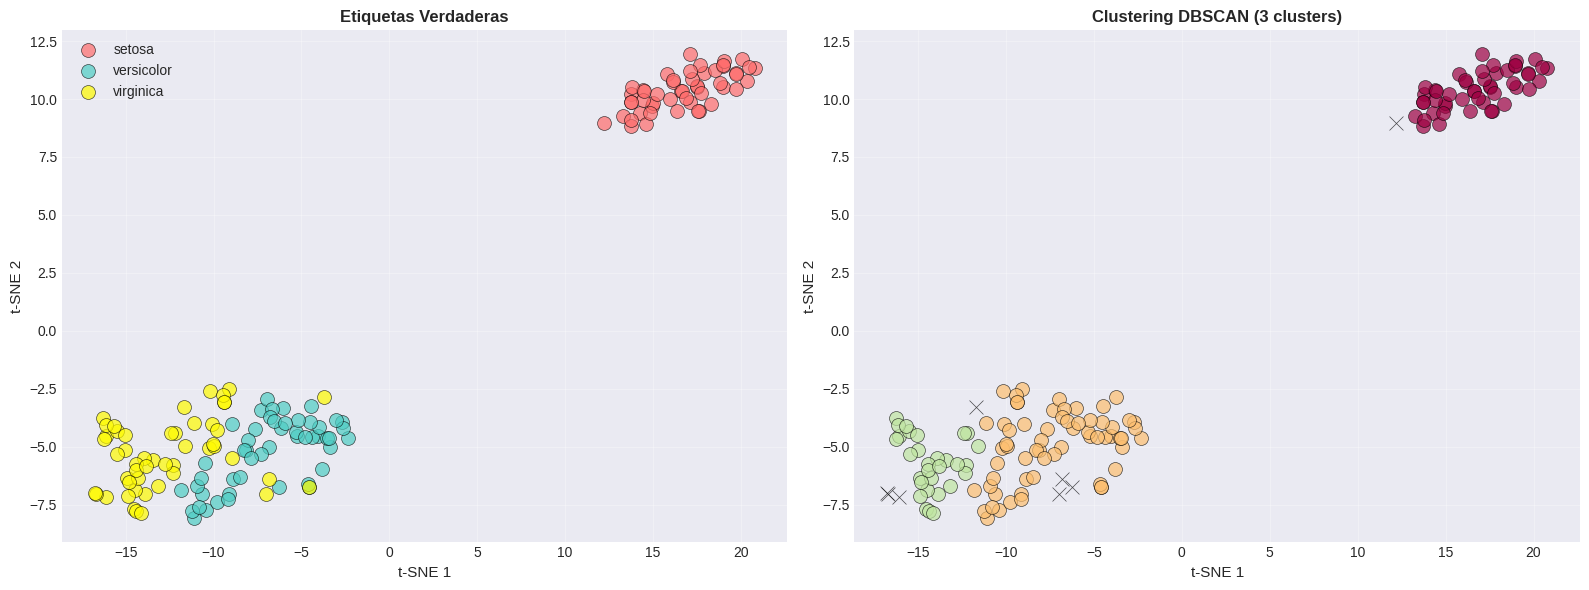

In [263]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Subplot 1: Etiquetas verdaderas
for i, species in enumerate(target_names):
    mask = y == i
    axes[0].scatter(X_tsne[mask, 0], X_tsne[mask, 1],
                    c=colors_map[i], label=species, alpha=0.7, s=100,
                    edgecolors='black', linewidths=0.5)

axes[0].set_title('Etiquetas Verdaderas', fontsize=12, fontweight='bold')
axes[0].set_xlabel('t-SNE 1', fontsize=11)
axes[0].set_ylabel('t-SNE 2', fontsize=11)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Subplot 2: Clustering DBSCAN
unique_labels = set(labels_tsne)
colors_dbscan = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

for k, col in zip(unique_labels, colors_dbscan):
    if k == -1:
        col = [0, 0, 0, 1]
        marker = 'x'
    else:
        marker = 'o'
    
    class_member_mask = (labels_tsne == k)
    xy = X_tsne[class_member_mask]
    axes[1].scatter(xy[:, 0], xy[:, 1], c=[col], marker=marker,
                    alpha=0.7, s=100, edgecolors='black', linewidths=0.5)

axes[1].set_title(f'Clustering DBSCAN ({n_clusters_tsne} clusters)', 
                  fontsize=12, fontweight='bold')
axes[1].set_xlabel('t-SNE 1', fontsize=11)
axes[1].set_ylabel('t-SNE 2', fontsize=11)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 3.7 Métricas de Evaluación

In [264]:
# Filtrar ruido para métricas
mask_tsne = labels_tsne != -1
X_tsne_filtered = X_tsne[mask_tsne]
labels_tsne_filtered = labels_tsne[mask_tsne]
y_filtered = y[mask_tsne]

print("=" * 60)
print("MÉTRICAS DE EVALUACIÓN - t-SNE + DBSCAN")
print("=" * 60)

# Métricas internas (no supervisadas)
if len(set(labels_tsne_filtered)) > 1:
    silhouette = silhouette_score(X_tsne_filtered, labels_tsne_filtered)
    calinski = calinski_harabasz_score(X_tsne_filtered, labels_tsne_filtered)
    davies = davies_bouldin_score(X_tsne_filtered, labels_tsne_filtered)
    
    print(f"\n Métricas Internas:")
    print(f"  • Silhouette Score:    {silhouette:.4f}  ([-1,1], mayor mejor)")
    print(f"  • Calinski-Harabasz:   {calinski:.2f}  (mayor mejor)")
    print(f"  • Davies-Bouldin:      {davies:.4f}  (menor mejor)")

# Métricas externas (supervisadas)
ari = adjusted_rand_score(y_filtered, labels_tsne_filtered)
nmi = normalized_mutual_info_score(y_filtered, labels_tsne_filtered)
homogeneity = homogeneity_score(y_filtered, labels_tsne_filtered)
completeness = completeness_score(y_filtered, labels_tsne_filtered)
v_measure = v_measure_score(y_filtered, labels_tsne_filtered)

print(f"\n Métricas Externas:")
print(f"  • Adjusted Rand Index: {ari:.4f}")
print(f"  • Mutual Information:  {nmi:.4f}")
print(f"  • Homogeneity:         {homogeneity:.4f}")
print(f"  • Completeness:        {completeness:.4f}")
print(f"  • V-Measure:           {v_measure:.4f}")

print(f"\n Resumen:")
print(f"  • Clusters: {n_clusters_tsne}")
print(f"  • Ruido: {n_noise_tsne} ({n_noise_tsne/len(labels_tsne)*100:.1f}%)")
print("=" * 60)

MÉTRICAS DE EVALUACIÓN - t-SNE + DBSCAN

 Métricas Internas:
  • Silhouette Score:    0.6299  ([-1,1], mayor mejor)
  • Calinski-Harabasz:   2287.04  (mayor mejor)
  • Davies-Bouldin:      0.4752  (menor mejor)

 Métricas Externas:
  • Adjusted Rand Index: 0.7550
  • Mutual Information:  0.8009
  • Homogeneity:         0.7858
  • Completeness:        0.8165
  • V-Measure:           0.8009

 Resumen:
  • Clusters: 3
  • Ruido: 8 (5.3%)


---

## Fase 4: Reducción Dimensional con UMAP + Clustering con DBSCAN

En esta fase vamos a:
- Aplicar **UMAP** para reducir de 4D a 2D
- Experimentar con hiperparámetros (`n_neighbors`, `min_dist`)
- Evaluar preservación de estructura local/global (k-NN accuracy)
- Medir tiempo de ejecución y calidad de clustering
- Aplicar **DBSCAN** sobre los datos reducidos
- Comparar resultados con t-SNE

### 4.1 Importar Librería UMAP

In [265]:
import umap
from sklearn.metrics import accuracy_score
from scipy.stats import mode

### 4.2 Experimentación: Hiperparámetros de UMAP

**Objetivo**: Encontrar combinación óptima de `n_neighbors` y `min_dist`.

**Hiperparámetros**:
- **n_neighbors**: Controla conectividad local (valores bajos = estructura más local, valores altos = estructura más global)
- **min_dist**: Control de compactación (valores bajos = clusters más compactos, valores altos = más dispersos)

**Métricas evaluadas**:
- **k-NN Accuracy**: Preservación de vecindarios (antes vs después de reducción)
- **Silhouette Score**: Calidad de separación de clusters
- **Tiempo de ejecución**: Eficiencia computacional

In [266]:
# Función auxiliar para calcular k-NN accuracy (preservación de vecindarios)
def calculate_knn_accuracy(X_original, X_reduced, k=10):
    """
    Calcula qué tan bien se preservan los k vecinos más cercanos
    después de la reducción dimensional.
    """
    # Encontrar k vecinos en espacio original
    nbrs_original = NearestNeighbors(n_neighbors=k+1)
    nbrs_original.fit(X_original)
    _, indices_original = nbrs_original.kneighbors(X_original)
    
    # Encontrar k vecinos en espacio reducido
    nbrs_reduced = NearestNeighbors(n_neighbors=k+1)
    nbrs_reduced.fit(X_reduced)
    _, indices_reduced = nbrs_reduced.kneighbors(X_reduced)
    
    # Calcular accuracy: proporción de vecinos preservados
    accuracies = []
    for i in range(len(X_original)):
        original_neighbors = set(indices_original[i, 1:])  # Excluir el punto mismo
        reduced_neighbors = set(indices_reduced[i, 1:])
        accuracy = len(original_neighbors & reduced_neighbors) / k
        accuracies.append(accuracy)
    
    return np.mean(accuracies)

In [267]:
# Experimentación con diferentes combinaciones de hiperparámetros
n_neighbors_values = [5, 15, 30, 50]
min_dist_values = [0.0, 0.1, 0.25, 0.5]

umap_results = {}

print("=" * 80)

# Probar diferentes n_neighbors con min_dist fijo
print("\n Parte 1: Variando n_neighbors (min_dist=0.1 fijo)")
print("-" * 80)

for n_neigh in n_neighbors_values:
    print(f"\n Procesando n_neighbors={n_neigh}...", end=" ")
    
    start_time = time.time()
    
    # Aplicar UMAP
    reducer = umap.UMAP(n_neighbors=n_neigh, min_dist=0.1, 
                       n_components=2, random_state=42, verbose=False)
    X_umap_temp = reducer.fit_transform(X_scaled)
    
    elapsed_time = time.time() - start_time
    
    # Calcular métricas
    silhouette = silhouette_score(X_umap_temp, y)
    knn_acc = calculate_knn_accuracy(X_scaled, X_umap_temp, k=10)
    
    # Guardar resultados
    key = f"n{n_neigh}_d0.1"
    umap_results[key] = {
        'embedding': X_umap_temp,
        'n_neighbors': n_neigh,
        'min_dist': 0.1,
        'execution_time': elapsed_time,
        'silhouette_score': silhouette,
        'knn_accuracy': knn_acc
    }
    
    print(f" {elapsed_time:.2f}s | Silhouette={silhouette:.4f} | k-NN Acc={knn_acc:.4f}")

# Probar diferentes min_dist con n_neighbors fijo
print("\n\n Parte 2: Variando min_dist (n_neighbors=15 fijo)")
print("-" * 80)

for min_d in min_dist_values:
    print(f"\n Procesando min_dist={min_d}...", end=" ")
    
    start_time = time.time()
    
    # Aplicar UMAP
    reducer = umap.UMAP(n_neighbors=15, min_dist=min_d, 
                       n_components=2, random_state=42, verbose=False)
    X_umap_temp = reducer.fit_transform(X_scaled)
    
    elapsed_time = time.time() - start_time
    
    # Calcular métricas
    silhouette = silhouette_score(X_umap_temp, y)
    knn_acc = calculate_knn_accuracy(X_scaled, X_umap_temp, k=10)
    
    # Guardar resultados
    key = f"n15_d{min_d}"
    umap_results[key] = {
        'embedding': X_umap_temp,
        'n_neighbors': 15,
        'min_dist': min_d,
        'execution_time': elapsed_time,
        'silhouette_score': silhouette,
        'knn_accuracy': knn_acc
    }
    
    print(f" {elapsed_time:.2f}s | Silhouette={silhouette:.4f} | k-NN Acc={knn_acc:.4f}")

print("\n" + "=" * 80)


 Parte 1: Variando n_neighbors (min_dist=0.1 fijo)
--------------------------------------------------------------------------------

 Procesando n_neighbors=5...  0.17s | Silhouette=0.2935 | k-NN Acc=0.7147

 Procesando n_neighbors=15...  0.25s | Silhouette=0.5314 | k-NN Acc=0.7327

 Procesando n_neighbors=30...  0.39s | Silhouette=0.5337 | k-NN Acc=0.7293

 Procesando n_neighbors=50...  0.51s | Silhouette=0.5066 | k-NN Acc=0.7240


 Parte 2: Variando min_dist (n_neighbors=15 fijo)
--------------------------------------------------------------------------------

 Procesando min_dist=0.0...  0.34s | Silhouette=0.5212 | k-NN Acc=0.7293

 Procesando min_dist=0.1...  0.34s | Silhouette=0.5314 | k-NN Acc=0.7327

 Procesando min_dist=0.25...  0.36s | Silhouette=0.5086 | k-NN Acc=0.7607

 Procesando min_dist=0.5...  0.36s | Silhouette=0.4979 | k-NN Acc=0.7567



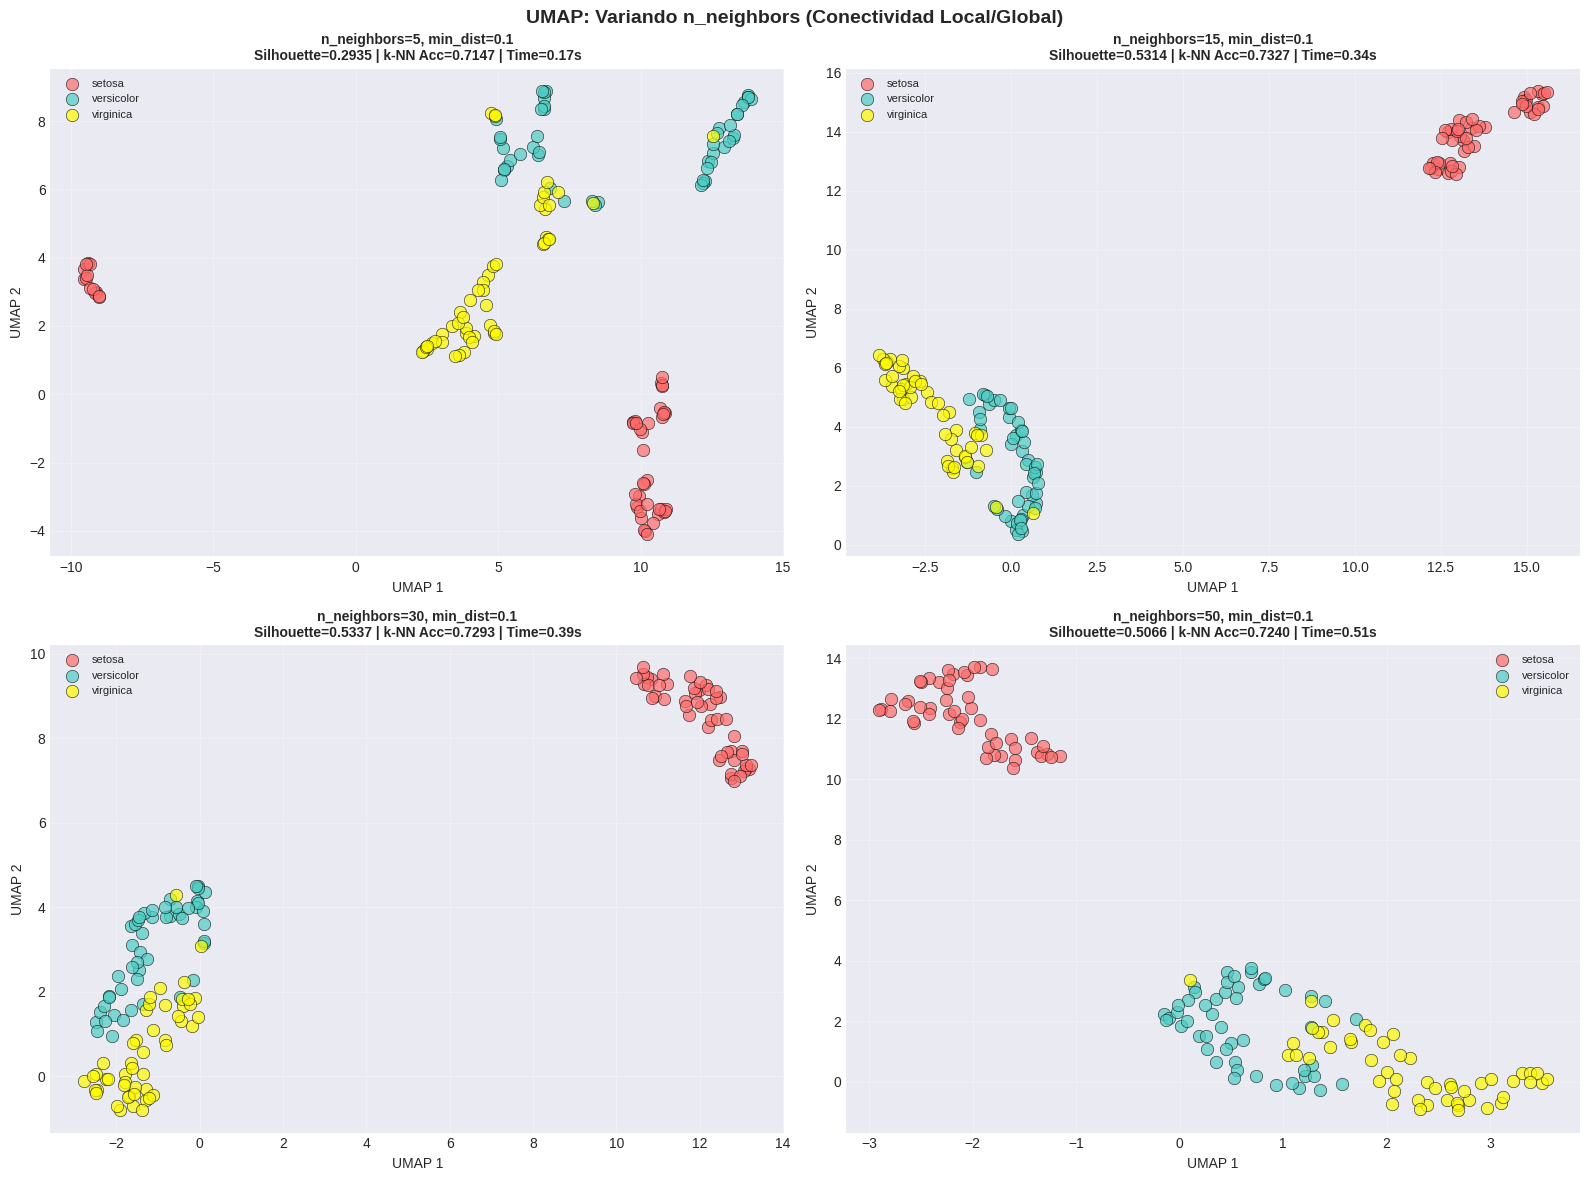

In [268]:
# Visualización de resultados: Variando n_neighbors
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.ravel()

colors_map = ['#FF6B6B', '#4ECDC4', '#FFFB00']

for idx, n_neigh in enumerate(n_neighbors_values):
    key = f"n{n_neigh}_d0.1"
    result = umap_results[key]
    X_umap_plot = result['embedding']
    
    ax = axes[idx]
    for i, species in enumerate(target_names):
        mask = y == i
        ax.scatter(X_umap_plot[mask, 0], X_umap_plot[mask, 1],
                   c=colors_map[i], label=species, alpha=0.7, s=80,
                   edgecolors='black', linewidths=0.5)
    
    ax.set_title(f'n_neighbors={n_neigh}, min_dist=0.1\n' +
                 f'Silhouette={result["silhouette_score"]:.4f} | ' +
                 f'k-NN Acc={result["knn_accuracy"]:.4f} | ' +
                 f'Time={result["execution_time"]:.2f}s',
                 fontsize=10, fontweight='bold')
    ax.legend(fontsize=8)
    ax.grid(True, alpha=0.3)
    ax.set_xlabel('UMAP 1', fontsize=10)
    ax.set_ylabel('UMAP 2', fontsize=10)

plt.suptitle('UMAP: Variando n_neighbors (Conectividad Local/Global)', 
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

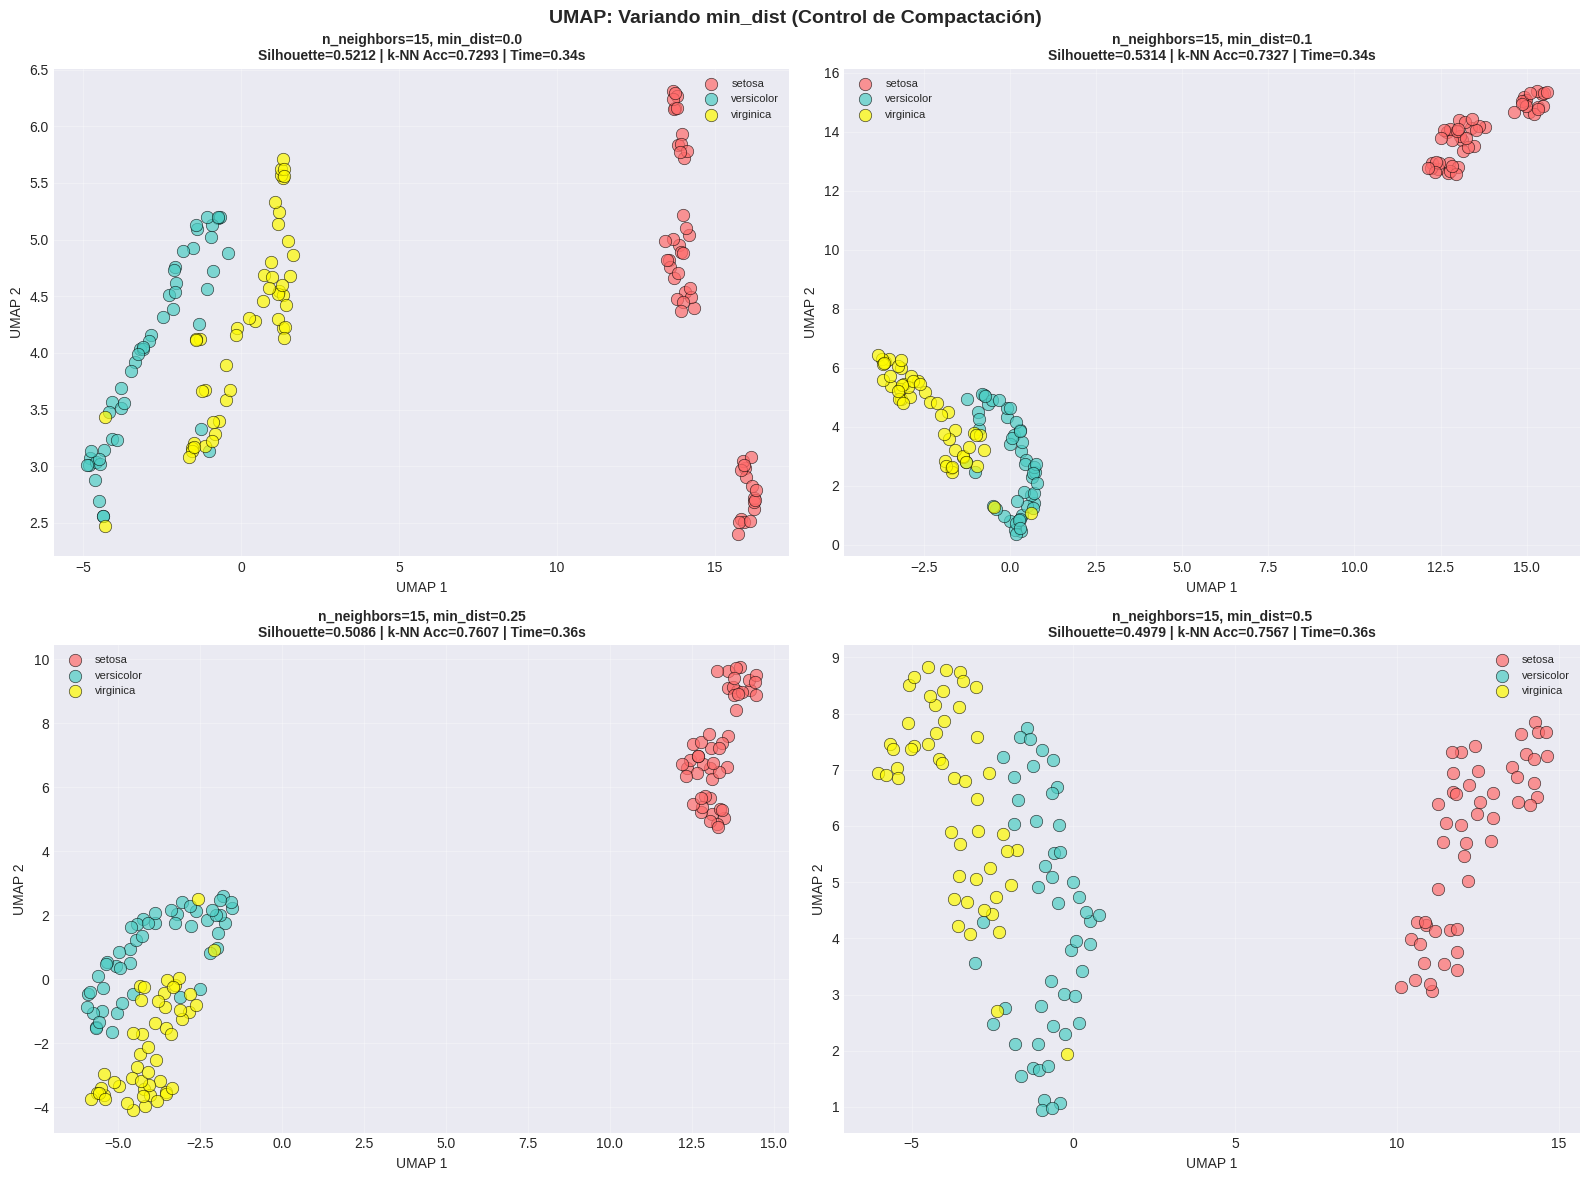

In [269]:
# Visualización de resultados: Variando min_dist
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.ravel()

for idx, min_d in enumerate(min_dist_values):
    key = f"n15_d{min_d}"
    result = umap_results[key]
    X_umap_plot = result['embedding']
    
    ax = axes[idx]
    for i, species in enumerate(target_names):
        mask = y == i
        ax.scatter(X_umap_plot[mask, 0], X_umap_plot[mask, 1],
                   c=colors_map[i], label=species, alpha=0.7, s=80,
                   edgecolors='black', linewidths=0.5)
    
    ax.set_title(f'n_neighbors=15, min_dist={min_d}\n' +
                 f'Silhouette={result["silhouette_score"]:.4f} | ' +
                 f'k-NN Acc={result["knn_accuracy"]:.4f} | ' +
                 f'Time={result["execution_time"]:.2f}s',
                 fontsize=10, fontweight='bold')
    ax.legend(fontsize=8)
    ax.grid(True, alpha=0.3)
    ax.set_xlabel('UMAP 1', fontsize=10)
    ax.set_ylabel('UMAP 2', fontsize=10)

plt.suptitle('UMAP: Variando min_dist (Control de Compactación)', 
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [270]:
# Tablas comparativas
print("=" * 90)
print("TABLA COMPARATIVA: Variando n_neighbors (min_dist=0.1)")
print("=" * 90)
print(f"\n{'n_neighbors':<13} {'Silhouette':<14} {'k-NN Accuracy':<16} {'Tiempo (s)':<12}")
print("-" * 90)
for n_neigh in n_neighbors_values:
    key = f"n{n_neigh}_d0.1"
    result = umap_results[key]
    print(f"{n_neigh:<13} {result['silhouette_score']:<14.4f} "
          f"{result['knn_accuracy']:<16.4f} {result['execution_time']:<12.2f}")

print("\n\n" + "=" * 90)
print("TABLA COMPARATIVA: Variando min_dist (n_neighbors=15)")
print("=" * 90)
print(f"\n{'min_dist':<13} {'Silhouette':<14} {'k-NN Accuracy':<16} {'Tiempo (s)':<12}")
print("-" * 90)
for min_d in min_dist_values:
    key = f"n15_d{min_d}"
    result = umap_results[key]
    print(f"{min_d:<13} {result['silhouette_score']:<14.4f} "
          f"{result['knn_accuracy']:<16.4f} {result['execution_time']:<12.2f}")

print("\n Interpretación:")
print("  • Silhouette Score: Mayor es mejor (calidad de separación)")
print("  • k-NN Accuracy: Mayor es mejor (preservación de vecindarios)")
print("  • n_neighbors alto → estructura más GLOBAL")
print("  • n_neighbors bajo → estructura más LOCAL")
print("  • min_dist bajo → clusters más COMPACTOS")
print("  • min_dist alto → clusters más DISPERSOS")
print("=" * 90)

TABLA COMPARATIVA: Variando n_neighbors (min_dist=0.1)

n_neighbors   Silhouette     k-NN Accuracy    Tiempo (s)  
------------------------------------------------------------------------------------------
5             0.2935         0.7147           0.17        
15            0.5314         0.7327           0.34        
30            0.5337         0.7293           0.39        
50            0.5066         0.7240           0.51        


TABLA COMPARATIVA: Variando min_dist (n_neighbors=15)

min_dist      Silhouette     k-NN Accuracy    Tiempo (s)  
------------------------------------------------------------------------------------------
0.0           0.5212         0.7293           0.34        
0.1           0.5314         0.7327           0.34        
0.25          0.5086         0.7607           0.36        
0.5           0.4979         0.7567           0.36        

 Interpretación:
  • Silhouette Score: Mayor es mejor (calidad de separación)
  • k-NN Accuracy: Mayor es mejor (p

### 4.3 Selección de Hiperparámetros UMAP

Basándote en las tablas y visualizaciones anteriores, selecciona la mejor combinación.

 Aplicando UMAP con parámetros seleccionados...
  • n_neighbors = 15
  • min_dist = 0.25

 UMAP aplicado exitosamente
  • Tiempo de ejecución: 0.25s
  • Silhouette Score: 0.5086
  • k-NN Accuracy: 0.7607
  • Forma: (150, 2)


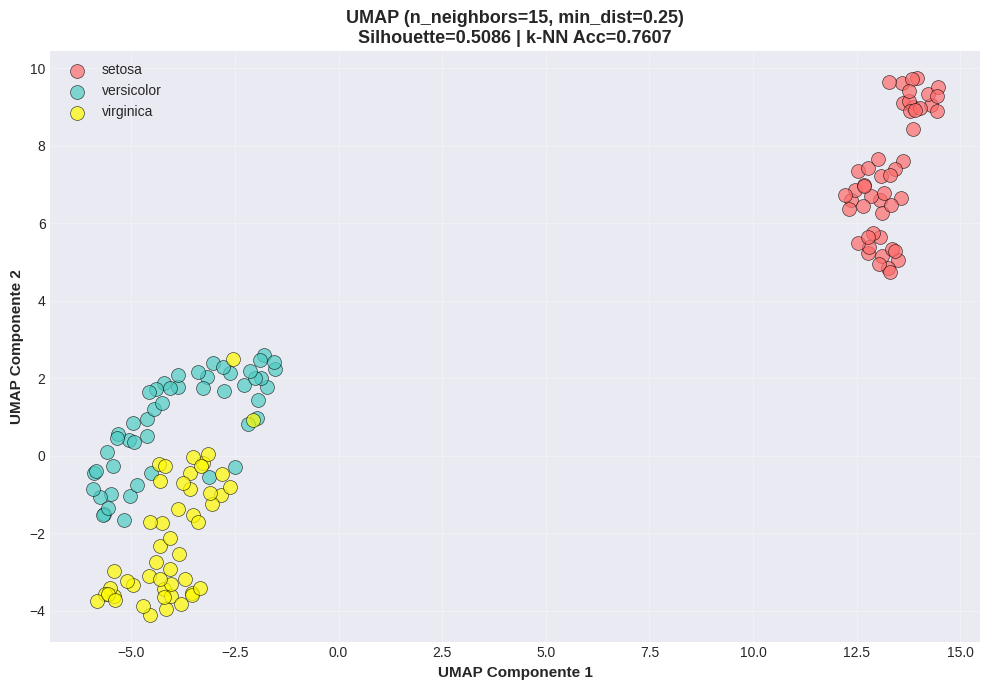

In [271]:
N_NEIGHBORS_SELECCIONADO = 15 
MIN_DIST_SELECCIONADO = 0.25   
# Aplicar UMAP con parámetros seleccionados
print(f" Aplicando UMAP con parámetros seleccionados...")
print(f"  • n_neighbors = {N_NEIGHBORS_SELECCIONADO}")
print(f"  • min_dist = {MIN_DIST_SELECCIONADO}")

start_time = time.time()

reducer_final = umap.UMAP(
    n_neighbors=N_NEIGHBORS_SELECCIONADO, 
    min_dist=MIN_DIST_SELECCIONADO,
    n_components=2, 
    random_state=42, 
    verbose=False
)
X_umap = reducer_final.fit_transform(X_scaled)

elapsed_time = time.time() - start_time

# Calcular métricas finales
silhouette_umap = silhouette_score(X_umap, y)
knn_acc_umap = calculate_knn_accuracy(X_scaled, X_umap, k=10)

print(f"\n UMAP aplicado exitosamente")
print(f"  • Tiempo de ejecución: {elapsed_time:.2f}s")
print(f"  • Silhouette Score: {silhouette_umap:.4f}")
print(f"  • k-NN Accuracy: {knn_acc_umap:.4f}")
print(f"  • Forma: {X_umap.shape}")

# Visualizar resultado final
plt.figure(figsize=(10, 7))
for i, species in enumerate(target_names):
    mask = y == i
    plt.scatter(X_umap[mask, 0], X_umap[mask, 1],
                c=colors_map[i], label=species, alpha=0.7, s=100,
                edgecolors='black', linewidths=0.5)

plt.title(f'UMAP (n_neighbors={N_NEIGHBORS_SELECCIONADO}, min_dist={MIN_DIST_SELECCIONADO})\n' +
          f'Silhouette={silhouette_umap:.4f} | k-NN Acc={knn_acc_umap:.4f}',
          fontsize=13, fontweight='bold')
plt.xlabel('UMAP Componente 1', fontsize=11, fontweight='bold')
plt.ylabel('UMAP Componente 2', fontsize=11, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### 4.4 Determinar Parámetros DBSCAN para UMAP

Usamos el mismo método k-distance para encontrar `eps` óptimo.

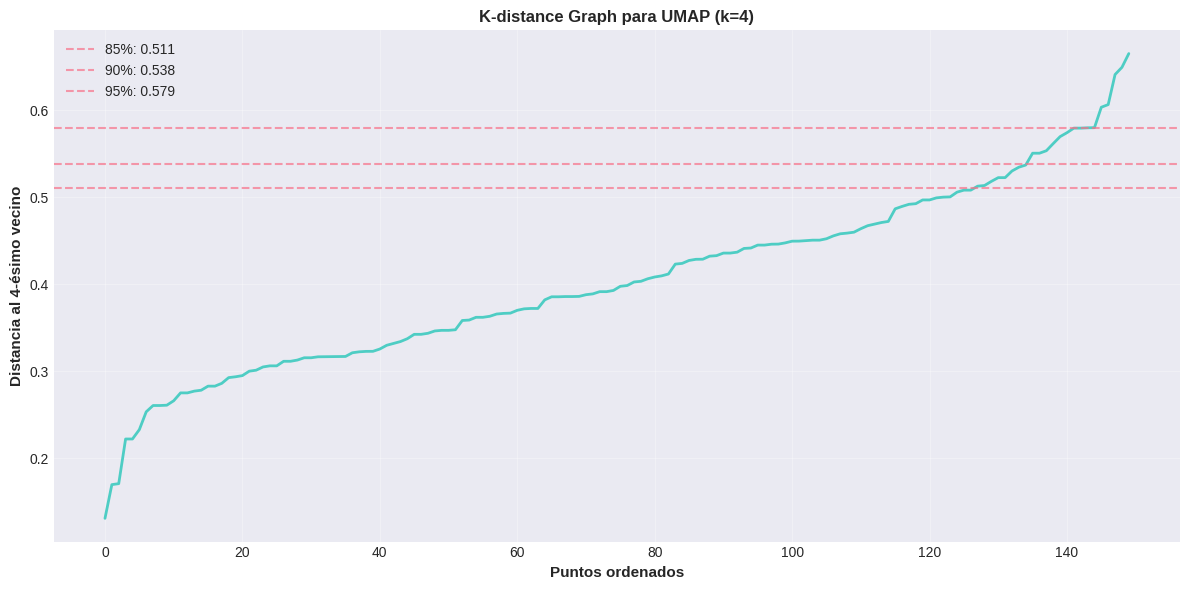

 Valores sugeridos para eps (UMAP):
  • Percentil 85%: 0.5109
  • Percentil 90%: 0.5382
  • Percentil 95%: 0.5792


In [272]:
# K-distance graph para UMAP
k_umap = 4
neighbors_umap = NearestNeighbors(n_neighbors=k_umap)
neighbors_umap.fit(X_umap)
distances_umap, _ = neighbors_umap.kneighbors(X_umap)
distances_umap_sorted = np.sort(distances_umap[:, k_umap-1], axis=0)

# Visualizar
plt.figure(figsize=(12, 6))
plt.plot(distances_umap_sorted, linewidth=2, color='#4ECDC4')
plt.xlabel('Puntos ordenados', fontsize=11, fontweight='bold')
plt.ylabel(f'Distancia al {k_umap}-ésimo vecino', fontsize=11, fontweight='bold')
plt.title(f'K-distance Graph para UMAP (k={k_umap})', 
          fontsize=12, fontweight='bold')
plt.grid(True, alpha=0.3)

# Sugerir valores
eps_suggestions_umap = {
    '85%': np.percentile(distances_umap_sorted, 85),
    '90%': np.percentile(distances_umap_sorted, 90),
    '95%': np.percentile(distances_umap_sorted, 95)
}

for label, value in eps_suggestions_umap.items():
    plt.axhline(y=value, linestyle='--', linewidth=1.5, alpha=0.7,
                label=f'{label}: {value:.3f}')
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

print(" Valores sugeridos para eps (UMAP):")
for label, value in eps_suggestions_umap.items():
    print(f"  • Percentil {label}: {value:.4f}")

### 4.5 Aplicar DBSCAN sobre UMAP

In [273]:
# Aplicar DBSCAN sobre UMAP
eps_value_umap = 0.5792  # Ajustar según el k-distance graph
min_samples_umap = 4

dbscan_umap = DBSCAN(eps=eps_value_umap, min_samples=min_samples_umap)
labels_umap = dbscan_umap.fit_predict(X_umap)

# Estadísticas
n_clusters_umap = len(set(labels_umap)) - (1 if -1 in labels_umap else 0)
n_noise_umap = list(labels_umap).count(-1)

print("=" * 70)
print("DBSCAN SOBRE UMAP - RESULTADOS")
print("=" * 70)
print(f"  • eps: {eps_value_umap}")
print(f"  • min_samples: {min_samples_umap}")
print(f"  • Clusters encontrados: {n_clusters_umap}")
print(f"  • Puntos de ruido: {n_noise_umap} ({n_noise_umap/len(labels_umap)*100:.1f}%)")
print("=" * 70)

DBSCAN SOBRE UMAP - RESULTADOS
  • eps: 0.5792
  • min_samples: 4
  • Clusters encontrados: 4
  • Puntos de ruido: 0 (0.0%)


### 4.6 Visualización: Etiquetas Reales vs DBSCAN (UMAP)

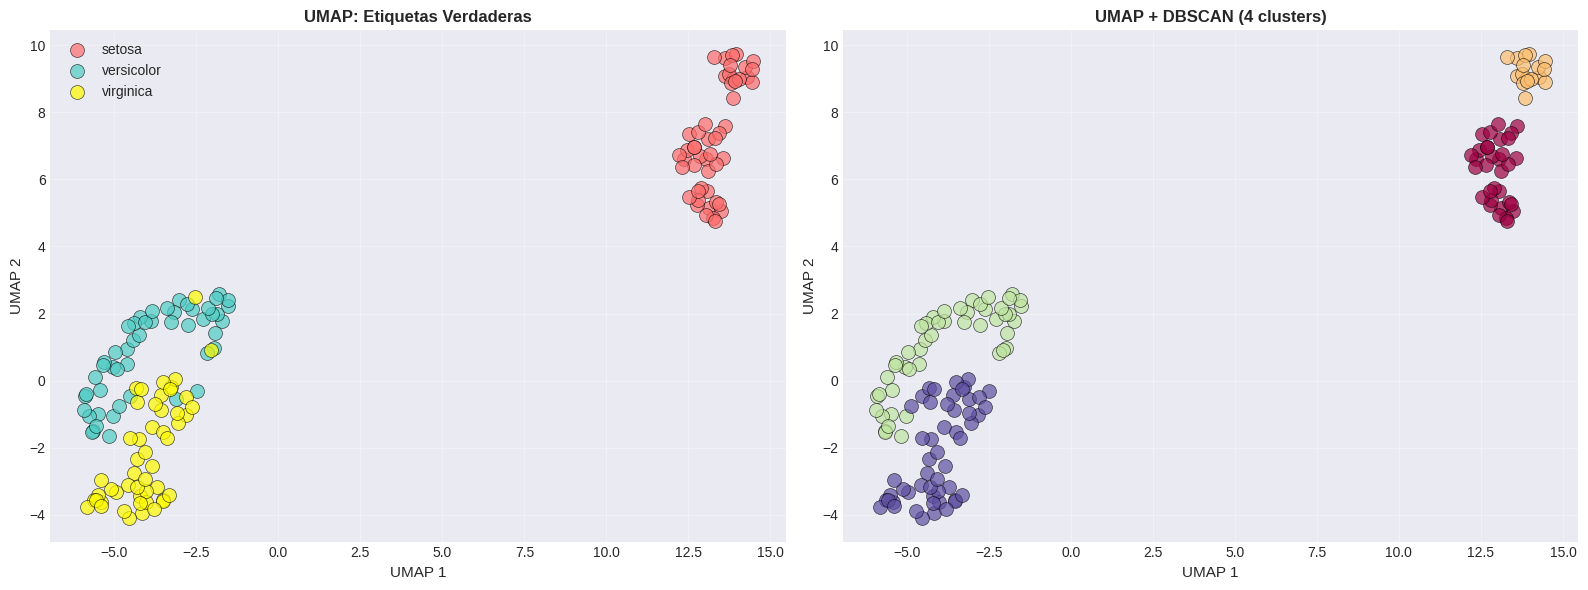

In [274]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Subplot 1: Etiquetas verdaderas
for i, species in enumerate(target_names):
    mask = y == i
    axes[0].scatter(X_umap[mask, 0], X_umap[mask, 1],
                    c=colors_map[i], label=species, alpha=0.7, s=100,
                    edgecolors='black', linewidths=0.5)

axes[0].set_title('UMAP: Etiquetas Verdaderas', fontsize=12, fontweight='bold')
axes[0].set_xlabel('UMAP 1', fontsize=11)
axes[0].set_ylabel('UMAP 2', fontsize=11)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Subplot 2: Clustering DBSCAN
unique_labels_umap = set(labels_umap)
colors_dbscan_umap = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels_umap)))

for k, col in zip(unique_labels_umap, colors_dbscan_umap):
    if k == -1:
        col = [0, 0, 0, 1]
        marker = 'x'
    else:
        marker = 'o'
    
    class_member_mask = (labels_umap == k)
    xy = X_umap[class_member_mask]
    axes[1].scatter(xy[:, 0], xy[:, 1], c=[col], marker=marker,
                    alpha=0.7, s=100, edgecolors='black', linewidths=0.5)

axes[1].set_title(f'UMAP + DBSCAN ({n_clusters_umap} clusters)', 
                  fontsize=12, fontweight='bold')
axes[1].set_xlabel('UMAP 1', fontsize=11)
axes[1].set_ylabel('UMAP 2', fontsize=11)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 4.7 Métricas de Evaluación UMAP + DBSCAN

In [275]:
# Filtrar ruido para métricas
mask_umap = labels_umap != -1
X_umap_filtered = X_umap[mask_umap]
labels_umap_filtered = labels_umap[mask_umap]
y_umap_filtered = y[mask_umap]

print("=" * 60)
print("MÉTRICAS DE EVALUACIÓN - UMAP + DBSCAN")
print("=" * 60)

# Métricas internas (no supervisadas)
if len(set(labels_umap_filtered)) > 1:
    silhouette_umap_dbscan = silhouette_score(X_umap_filtered, labels_umap_filtered)
    calinski_umap = calinski_harabasz_score(X_umap_filtered, labels_umap_filtered)
    davies_umap = davies_bouldin_score(X_umap_filtered, labels_umap_filtered)
    
    print(f"\n Métricas Internas:")
    print(f"  • Silhouette Score:    {silhouette_umap_dbscan:.4f}  ([-1,1], mayor mejor)")
    print(f"  • Calinski-Harabasz:   {calinski_umap:.2f}  (mayor mejor)")
    print(f"  • Davies-Bouldin:      {davies_umap:.4f}  (menor mejor)")

# Métricas externas (supervisadas)
ari_umap = adjusted_rand_score(y_umap_filtered, labels_umap_filtered)
nmi_umap = normalized_mutual_info_score(y_umap_filtered, labels_umap_filtered)
homogeneity_umap = homogeneity_score(y_umap_filtered, labels_umap_filtered)
completeness_umap = completeness_score(y_umap_filtered, labels_umap_filtered)
v_measure_umap = v_measure_score(y_umap_filtered, labels_umap_filtered)

# Calcular Accuracy
# Estrategia: asignar cada cluster a la clase mayoritaria

unique_clusters = np.unique(labels_umap_filtered)
predicted_labels = np.copy(labels_umap_filtered)

for cluster in unique_clusters:
    mask_cluster = labels_umap_filtered == cluster
    majority_class = mode(y_umap_filtered[mask_cluster], keepdims=True)[0][0]
    predicted_labels[mask_cluster] = majority_class

accuracy_umap = accuracy_score(y_umap_filtered, predicted_labels)

print(f"\n Métricas Externas:")
print(f"  • Accuracy:            {accuracy_umap:.4f}  (asignación por mayoría)")
print(f"  • Adjusted Rand Index: {ari_umap:.4f}")
print(f"  • Mutual Information:  {nmi_umap:.4f}")
print(f"  • Homogeneity:         {homogeneity_umap:.4f}")
print(f"  • Completeness:        {completeness_umap:.4f}")
print(f"  • V-Measure:           {v_measure_umap:.4f}")

print(f"\n Resumen:")
print(f"  • Clusters: {n_clusters_umap}")
print(f"  • Ruido: {n_noise_umap} ({n_noise_umap/len(labels_umap)*100:.1f}%)")
print("=" * 60)

MÉTRICAS DE EVALUACIÓN - UMAP + DBSCAN

 Métricas Internas:
  • Silhouette Score:    0.4571  ([-1,1], mayor mejor)
  • Calinski-Harabasz:   1718.70  (mayor mejor)
  • Davies-Bouldin:      0.7420  (menor mejor)

 Métricas Externas:
  • Accuracy:            0.9600  (asignación por mayoría)
  • Adjusted Rand Index: 0.7628
  • Mutual Information:  0.7876
  • Homogeneity:         0.8640
  • Completeness:        0.7236
  • V-Measure:           0.7876

 Resumen:
  • Clusters: 4
  • Ruido: 0 (0.0%)


---

## Fase 5: Comparación Final - t-SNE vs UMAP

Comparación comprehensiva de ambos métodos de reducción dimensional aplicados a DBSCAN.

### 5.1 Comparación Cuantitativa

In [276]:
# Calcular accuracy para t-SNE también
unique_clusters_tsne = np.unique(labels_tsne_filtered)
predicted_labels_tsne = np.copy(labels_tsne_filtered)

for cluster in unique_clusters_tsne:
    mask_cluster = labels_tsne_filtered == cluster
    majority_class = mode(y_filtered[mask_cluster], keepdims=True)[0][0]
    predicted_labels_tsne[mask_cluster] = majority_class

accuracy_tsne = accuracy_score(y_filtered, predicted_labels_tsne)

# Tabla comparativa completa
print("=" * 95)
print(" " * 25 + "COMPARACIÓN FINAL: t-SNE vs UMAP + DBSCAN")
print("=" * 95)
print(f"\n{'Métrica':<30} {'t-SNE':<20} {'UMAP':<20} {'Mejor':<15}")
print("-" * 95)

# Comparar cada métrica
metricas = {
    'Tiempo de reducción (s)': (
        tsne_results[PERPLEXITY_SELECCIONADO]['execution_time'],
        elapsed_time
    ),
    'k-NN Accuracy': (
        'N/A',  # No calculado para t-SNE en experimentación
        knn_acc_umap
    ),
    'Clusters encontrados': (n_clusters_tsne, n_clusters_umap),
    'Puntos de ruido (%)': (
        n_noise_tsne/len(labels_tsne)*100,
        n_noise_umap/len(labels_umap)*100
    ),
    'Accuracy': (accuracy_tsne, accuracy_umap),
    'Silhouette Score': (silhouette, silhouette_umap_dbscan),
    'Calinski-Harabasz': (calinski, calinski_umap),
    'Davies-Bouldin': (davies, davies_umap),
    'Adjusted Rand Index': (ari, ari_umap),
    'Normalized Mutual Info': (nmi, nmi_umap),
    'Homogeneity': (homogeneity, homogeneity_umap),
    'Completeness': (completeness, completeness_umap),
    'V-Measure': (v_measure, v_measure_umap)
}

for metrica, (val_tsne, val_umap) in metricas.items():
    # Determinar cuál es mejor
    if metrica in ['Tiempo de reducción (s)', 'Puntos de ruido (%)', 'Davies-Bouldin']:
        # Menor es mejor
        if isinstance(val_tsne, str) or isinstance(val_umap, str):
            mejor = 'N/A'
        else:
            mejor = 't-SNE' if val_tsne < val_umap else 'UMAP'
    else:
        # Mayor es mejor
        if isinstance(val_tsne, str) or isinstance(val_umap, str):
            mejor = 'N/A'
        else:
            mejor = 't-SNE' if val_tsne > val_umap else 'UMAP'
    
    # Formatear valores
    if isinstance(val_tsne, str):
        str_tsne = val_tsne
    elif isinstance(val_tsne, int):
        str_tsne = f"{val_tsne}"
    else:
        str_tsne = f"{val_tsne:.4f}"
    
    if isinstance(val_umap, str):
        str_umap = val_umap
    elif isinstance(val_umap, int):
        str_umap = f"{val_umap}"
    else:
        str_umap = f"{val_umap:.4f}"
    
    print(f"{metrica:<30} {str_tsne:<20} {str_umap:<20} {mejor:<15}")

print("=" * 95)

# Resumen interpretativo
print("\n INTERPRETACIÓN:")
print("-" * 95)
print(" Métricas donde MAYOR es MEJOR:")
print("  • Accuracy, Silhouette, Calinski-Harabasz, ARI, NMI, Homogeneity, Completeness, V-Measure, k-NN Accuracy")
print("\n Métricas donde MENOR es MEJOR:")
print("  • Tiempo de ejecución, Puntos de ruido (%), Davies-Bouldin")
print("=" * 95)

                         COMPARACIÓN FINAL: t-SNE vs UMAP + DBSCAN

Métrica                        t-SNE                UMAP                 Mejor          
-----------------------------------------------------------------------------------------------
Tiempo de reducción (s)        0.7366               0.2499               UMAP           
k-NN Accuracy                  N/A                  0.7607               N/A            
Clusters encontrados           3                    4                    UMAP           
Puntos de ruido (%)            5.3333               0.0000               UMAP           
Accuracy                       0.9014               0.9600               UMAP           
Silhouette Score               0.4979               0.4571               t-SNE          
Calinski-Harabasz              2287.0422            1718.7040            t-SNE          
Davies-Bouldin                 0.4752               0.7420               t-SNE          
Adjusted Rand Index            0.75

### 5.2 Comparación Visual

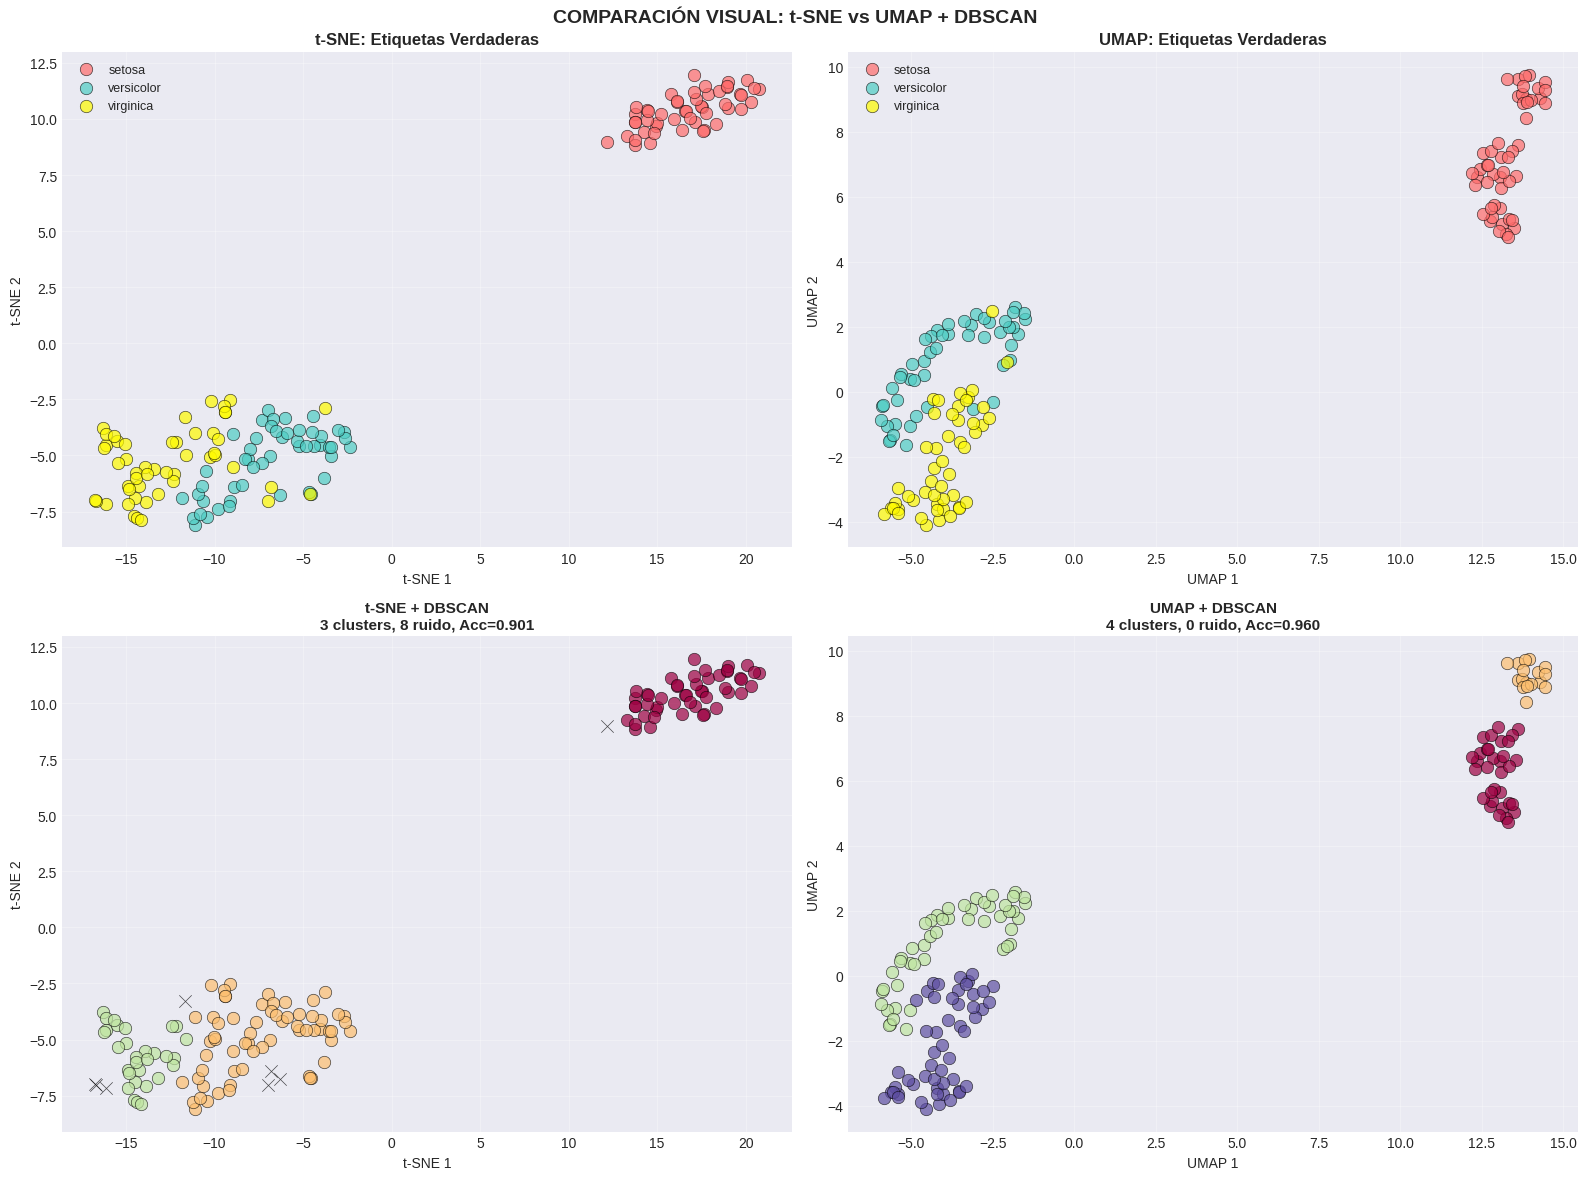

In [277]:
# Visualización lado a lado: t-SNE vs UMAP
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Fila 1: Etiquetas verdaderas
# t-SNE
for i, species in enumerate(target_names):
    mask = y == i
    axes[0, 0].scatter(X_tsne[mask, 0], X_tsne[mask, 1],
                       c=colors_map[i], label=species, alpha=0.7, s=80,
                       edgecolors='black', linewidths=0.5)

axes[0, 0].set_title('t-SNE: Etiquetas Verdaderas', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('t-SNE 1', fontsize=10)
axes[0, 0].set_ylabel('t-SNE 2', fontsize=10)
axes[0, 0].legend(fontsize=9)
axes[0, 0].grid(True, alpha=0.3)

# UMAP
for i, species in enumerate(target_names):
    mask = y == i
    axes[0, 1].scatter(X_umap[mask, 0], X_umap[mask, 1],
                       c=colors_map[i], label=species, alpha=0.7, s=80,
                       edgecolors='black', linewidths=0.5)

axes[0, 1].set_title('UMAP: Etiquetas Verdaderas', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('UMAP 1', fontsize=10)
axes[0, 1].set_ylabel('UMAP 2', fontsize=10)
axes[0, 1].legend(fontsize=9)
axes[0, 1].grid(True, alpha=0.3)

# Fila 2: Clustering DBSCAN
# t-SNE + DBSCAN
colors_tsne_plot = plt.cm.Spectral(np.linspace(0, 1, len(set(labels_tsne))))
for k, col in zip(set(labels_tsne), colors_tsne_plot):
    if k == -1:
        col = [0, 0, 0, 1]
        marker = 'x'
    else:
        marker = 'o'
    
    class_member_mask = (labels_tsne == k)
    xy = X_tsne[class_member_mask]
    axes[1, 0].scatter(xy[:, 0], xy[:, 1], c=[col], marker=marker,
                       alpha=0.7, s=80, edgecolors='black', linewidths=0.5)

axes[1, 0].set_title(f't-SNE + DBSCAN\n{n_clusters_tsne} clusters, {n_noise_tsne} ruido, Acc={accuracy_tsne:.3f}',
                     fontsize=11, fontweight='bold')
axes[1, 0].set_xlabel('t-SNE 1', fontsize=10)
axes[1, 0].set_ylabel('t-SNE 2', fontsize=10)
axes[1, 0].grid(True, alpha=0.3)

# UMAP + DBSCAN
colors_umap_plot = plt.cm.Spectral(np.linspace(0, 1, len(set(labels_umap))))
for k, col in zip(set(labels_umap), colors_umap_plot):
    if k == -1:
        col = [0, 0, 0, 1]
        marker = 'x'
    else:
        marker = 'o'
    
    class_member_mask = (labels_umap == k)
    xy = X_umap[class_member_mask]
    axes[1, 1].scatter(xy[:, 0], xy[:, 1], c=[col], marker=marker,
                       alpha=0.7, s=80, edgecolors='black', linewidths=0.5)

axes[1, 1].set_title(f'UMAP + DBSCAN\n{n_clusters_umap} clusters, {n_noise_umap} ruido, Acc={accuracy_umap:.3f}',
                     fontsize=11, fontweight='bold')
axes[1, 1].set_xlabel('UMAP 1', fontsize=10)
axes[1, 1].set_ylabel('UMAP 2', fontsize=10)
axes[1, 1].grid(True, alpha=0.3)

plt.suptitle('COMPARACIÓN VISUAL: t-SNE vs UMAP + DBSCAN', 
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()